# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></div><div class="lev1 toc-item"><a href="#Average-temperature-by-hour" data-toc-modified-id="Average-temperature-by-hour-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Average temperature by hour</a></div><div class="lev1 toc-item"><a href="#Demonstrate-measurement-error" data-toc-modified-id="Demonstrate-measurement-error-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Demonstrate measurement error</a></div><div class="lev1 toc-item"><a href="#Useful-metrics" data-toc-modified-id="Useful-metrics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Useful metrics</a></div><div class="lev2 toc-item"><a href="#Average-$T_x$-and-$T_n$" data-toc-modified-id="Average-$T_x$-and-$T_n$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Average <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-50"><span class="MJXp-msubsup" id="MJXp-Span-51"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-52" style="margin-right: 0.05em;">T</span><span class="MJXp-mi MJXp-italic MJXp-script" id="MJXp-Span-53" style="vertical-align: -0.4em;">x</span></span></span></span><script type="math/tex" id="MathJax-Element-14">T_x</script> and <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-54"><span class="MJXp-msubsup" id="MJXp-Span-55"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-56" style="margin-right: 0.05em;">T</span><span class="MJXp-mi MJXp-italic MJXp-script" id="MJXp-Span-57" style="vertical-align: -0.4em;">n</span></span></span></span><script type="math/tex" id="MathJax-Element-15">T_n</script></a></div><div class="lev2 toc-item"><a href="#Mean-absolute-change-in-$T_x$-and-$T_n$-from-one-day-to-the-next" data-toc-modified-id="Mean-absolute-change-in-$T_x$-and-$T_n$-from-one-day-to-the-next-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mean absolute change in <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-58"><span class="MJXp-msubsup" id="MJXp-Span-59"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-60" style="margin-right: 0.05em;">T</span><span class="MJXp-mi MJXp-italic MJXp-script" id="MJXp-Span-61" style="vertical-align: -0.4em;">x</span></span></span></span><script type="math/tex" id="MathJax-Element-16">T_x</script> and <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-62"><span class="MJXp-msubsup" id="MJXp-Span-63"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-64" style="margin-right: 0.05em;">T</span><span class="MJXp-mi MJXp-italic MJXp-script" id="MJXp-Span-65" style="vertical-align: -0.4em;">n</span></span></span></span><script type="math/tex" id="MathJax-Element-17">T_n</script> from one day to the next</a></div><div class="lev2 toc-item"><a href="#Standard-deviation-of-change-in-$T_x$-and-$T_n$-from-one-day-to-the-next" data-toc-modified-id="Standard-deviation-of-change-in-$T_x$-and-$T_n$-from-one-day-to-the-next-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Standard deviation of change in <span class="MathJax_Preview">T_x</span><script type="math/tex">T_x</script> and <span class="MathJax_Preview">T_n</span><script type="math/tex">T_n</script> from one day to the next</a></div><div class="lev1 toc-item"><a href="#Metrics-that-turned-out-to-be-less-insightful" data-toc-modified-id="Metrics-that-turned-out-to-be-less-insightful-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metrics that turned out to be less insightful</a></div>

$$
    \newcommand{\genericdel}[3]{%
      \left#1#3\right#2
    }
    \newcommand{\del}[1]{\genericdel(){#1}}
    \newcommand{\sbr}[1]{\genericdel[]{#1}}
    \newcommand{\cbr}[1]{\genericdel\{\}{#1}}
    \newcommand{\abs}[1]{\genericdel||{#1}}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \DeclareMathOperator{\Pr}{\mathbb{p}}
    \DeclareMathOperator{\E}{\mathbb{E}}
    \DeclareMathOperator{\Ind}{\mathbb{I}}
    \DeclareMathOperator{\var}{var}
    \DeclareMathOperator{\cov}{cov}
    \DeclareMathOperator{\invchi}{\mathrm{Inv-\chi}^2}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \newcommand{\effect}{\mathrm{eff}}
    \newcommand{\xtilde}{\widetilde{X}}
    \DeclareMathOperator{\normal}{\mathcal{N}}
    \DeclareMathOperator{\unif}{Uniform}
    \DeclareMathOperator{\GP}{\mathcal{GP}}
    \DeclareMathOperator{\l}{\mathscr{l}}
    \newcommand{\Tn}{\mathrm{T}_{n}}
    \newcommand{\Tx}{\mathrm{T}_{x}}
$$

# Preprocessing

In [1]:
using TimeSeries
using DataFrames
using Proj4
using DataFrames: head
;

In [2]:
import PyPlot; plt=PyPlot
using LaTeXStrings
plt.rc("figure", dpi=300.0)
plt.rc("figure", figsize=(12,8))
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

In [3]:
include("src/preprocessing.jl")
include("src/utils.jl")

measurement_date (generic function with 1 method)

In [4]:
isdList=read_isdList()
isdSubset=isdList[[(usaf in (725450,725460,725480,725485)) for usaf in isdList[:USAF].values],:]
isdSubset

,USAF,WBAN,NAME,CTRY,STATE,ICAO,LAT,LON,ELEV,BEGIN,END,X_PRJ,Y_PRJ
1,725450,14990,THE EASTERN IOWA AIRPORT,US,IA,KCID,41.883,-91.717,264.6,1973,2015,1.64799e6,1.0441e6
2,725460,14933,DES MOINES INTERNATIONAL AIRPORT,US,IA,KDSM,41.534,-93.653,291.7,1973,2015,1.48723e6,1.00379e6
3,725480,94910,WATERLOO MUNICIPAL AIRPORT,US,IA,KALO,42.554,-92.401,264.6,1960,2015,1.59025e6,1.11766e6
4,725485,14940,MASON CITY MUNICIPAL ARPT,US,IA,KMCW,43.154,-93.327,373.4,1973,2015,1.51407e6,1.18374e6


In [5]:
hourly_cat=read_Stations(isdSubset)
;

In [6]:
head(hourly_cat)

,year,month,day,hour,min,seconds,temp,ts,station,ts_hours
1,2015,1,1,0,52,0,-7.8,2015-01-01T00:52:00,1,0.866667
2,2015,1,1,1,52,0,-8.3,2015-01-01T01:52:00,1,1.86667
3,2015,1,1,2,52,0,-8.3,2015-01-01T02:52:00,1,2.86667
4,2015,1,1,3,52,0,-9.4,2015-01-01T03:52:00,1,3.86667
5,2015,1,1,4,52,0,-9.4,2015-01-01T04:52:00,1,4.86667
6,2015,1,1,5,52,0,-10.0,2015-01-01T05:52:00,1,5.86667


In [58]:
TnTx_dict = Dict{Hour,DataFrame}()
for hr in 0:24
    hr_measure = Hour(hr) # number between 0 and 24
    hourly_cat[:ts_day] = [measurement_date(t, hr_measure) for t in hourly_cat[:ts].values]

    TnTx = DataFrames.by(hourly_cat, [:ts_day, :station], df -> DataFrame(
        Tn=minimum(df[:temp].values), 
        Tx=maximum(df[:temp].values)))
    TnTx_dict[hr_measure] = TnTx
end

# Average temperature by hour

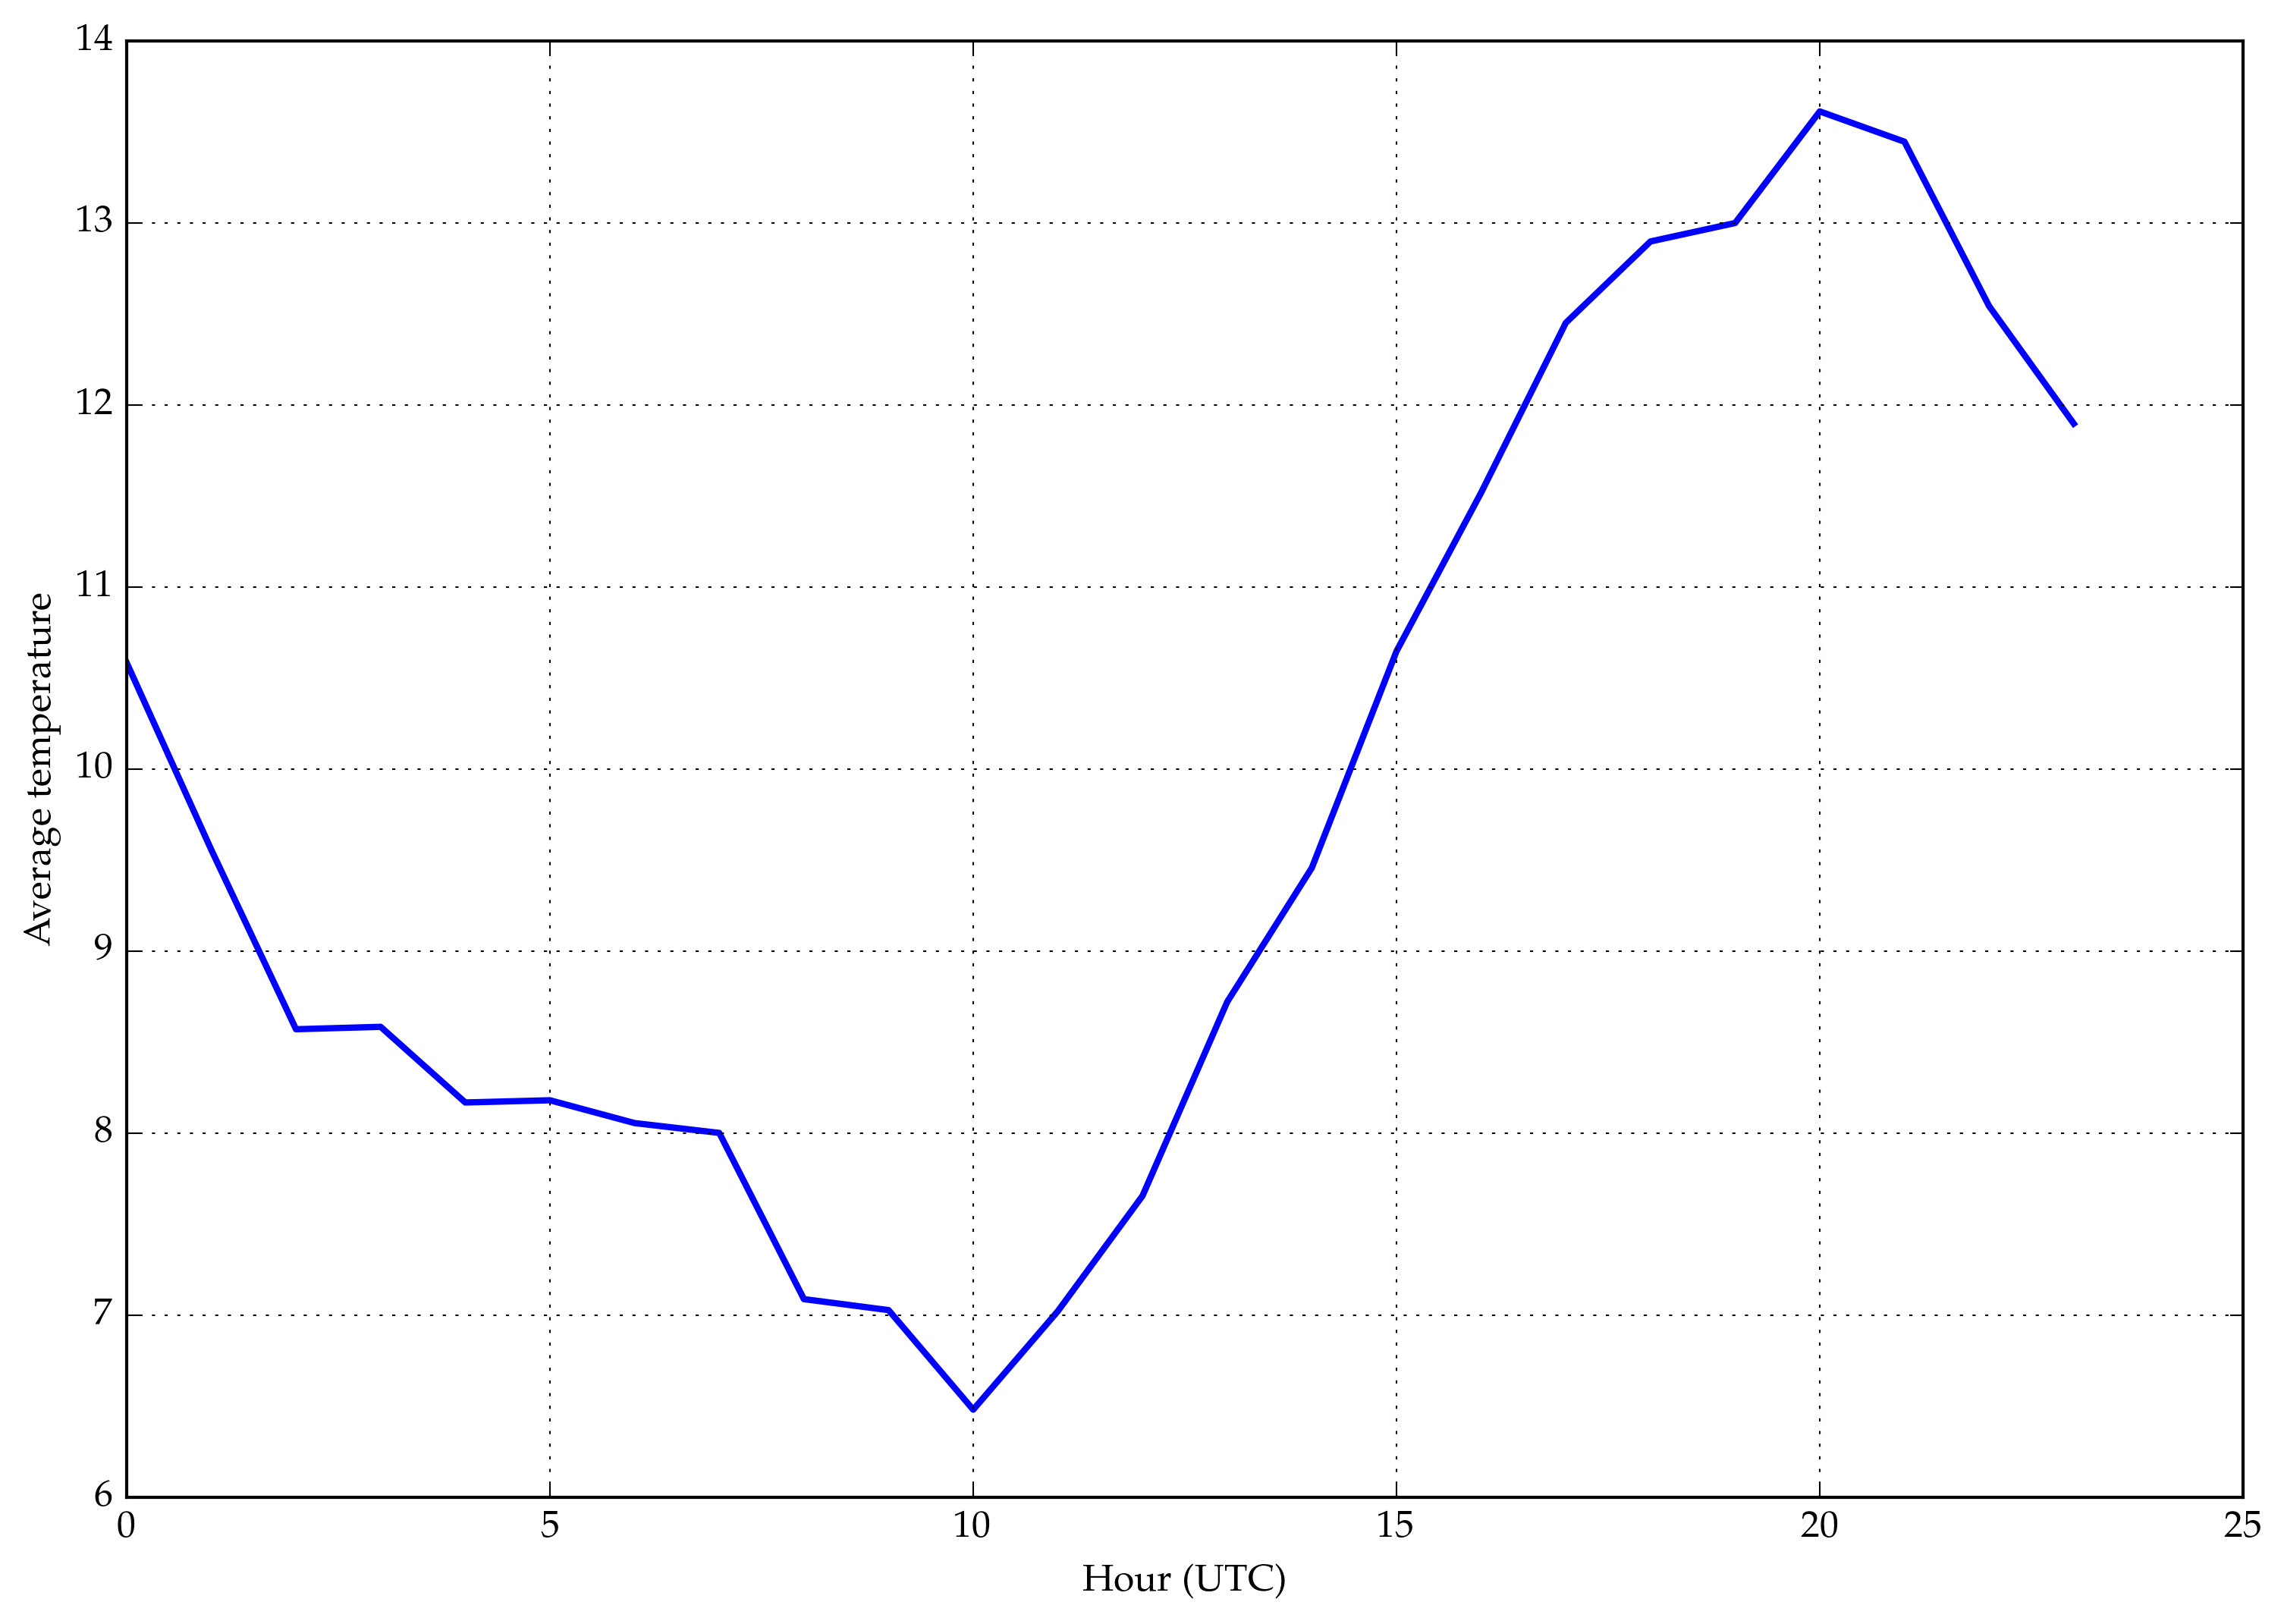

In [8]:
tbar=DataFrames.by(hourly_cat, [:hour, :station], df->mean(df[:temp].values))
tbar1 = tbar[tbar[:station].values.==1,:]
plt.plot(tbar1[:hour].values, tbar1[:x1].values, linewidth=2)
plt.ylabel("Average temperature")
plt.xlabel("Hour (UTC)")
plt.grid(true)
;

The coldest hour is 10:00, and the warmest is 20:00. These times are all UTC.

# Demonstrate measurement error

In [57]:
waterloo_TnTx_dict = Dict{Hour,DataFrame}()
for hr in Hour(0):Hour(24)
    waterloo[:ts_day] = [measurement_date(t, hr) for t in waterloo[:ts].values]
    TnTx = DataFrames.by(waterloo, :ts_day, df -> DataFrame(
            Tn=minimum(df[:temp].values), 
            Tx=maximum(df[:temp].values),
            Tn_time=df[:ts].values[indmin(df[:temp].values)],
            Tx_time=df[:ts].values[indmax(df[:temp].values)],
            ))
    waterloo_TnTx_dict[hr] = TnTx
end

In [59]:
head(waterloo_TnTx_dict[Hour(10)])

,ts_day,Tn,Tx,Tn_time,Tx_time
1,2015-01-01,-11.1,-8.3,2015-01-01T08:54:00,2015-01-01T00:00:00
2,2015-01-02,-11.1,1.7,2015-01-01T12:54:00,2015-01-01T19:54:00
3,2015-01-03,-10.6,-1.0,2015-01-02T11:54:00,2015-01-02T19:52:00
4,2015-01-04,-10.0,0.6,2015-01-04T09:21:00,2015-01-03T18:54:00
5,2015-01-05,-20.6,-10.6,2015-01-05T09:54:00,2015-01-04T10:17:00
6,2015-01-06,-27.8,-13.9,2015-01-06T09:54:00,2015-01-06T00:54:00


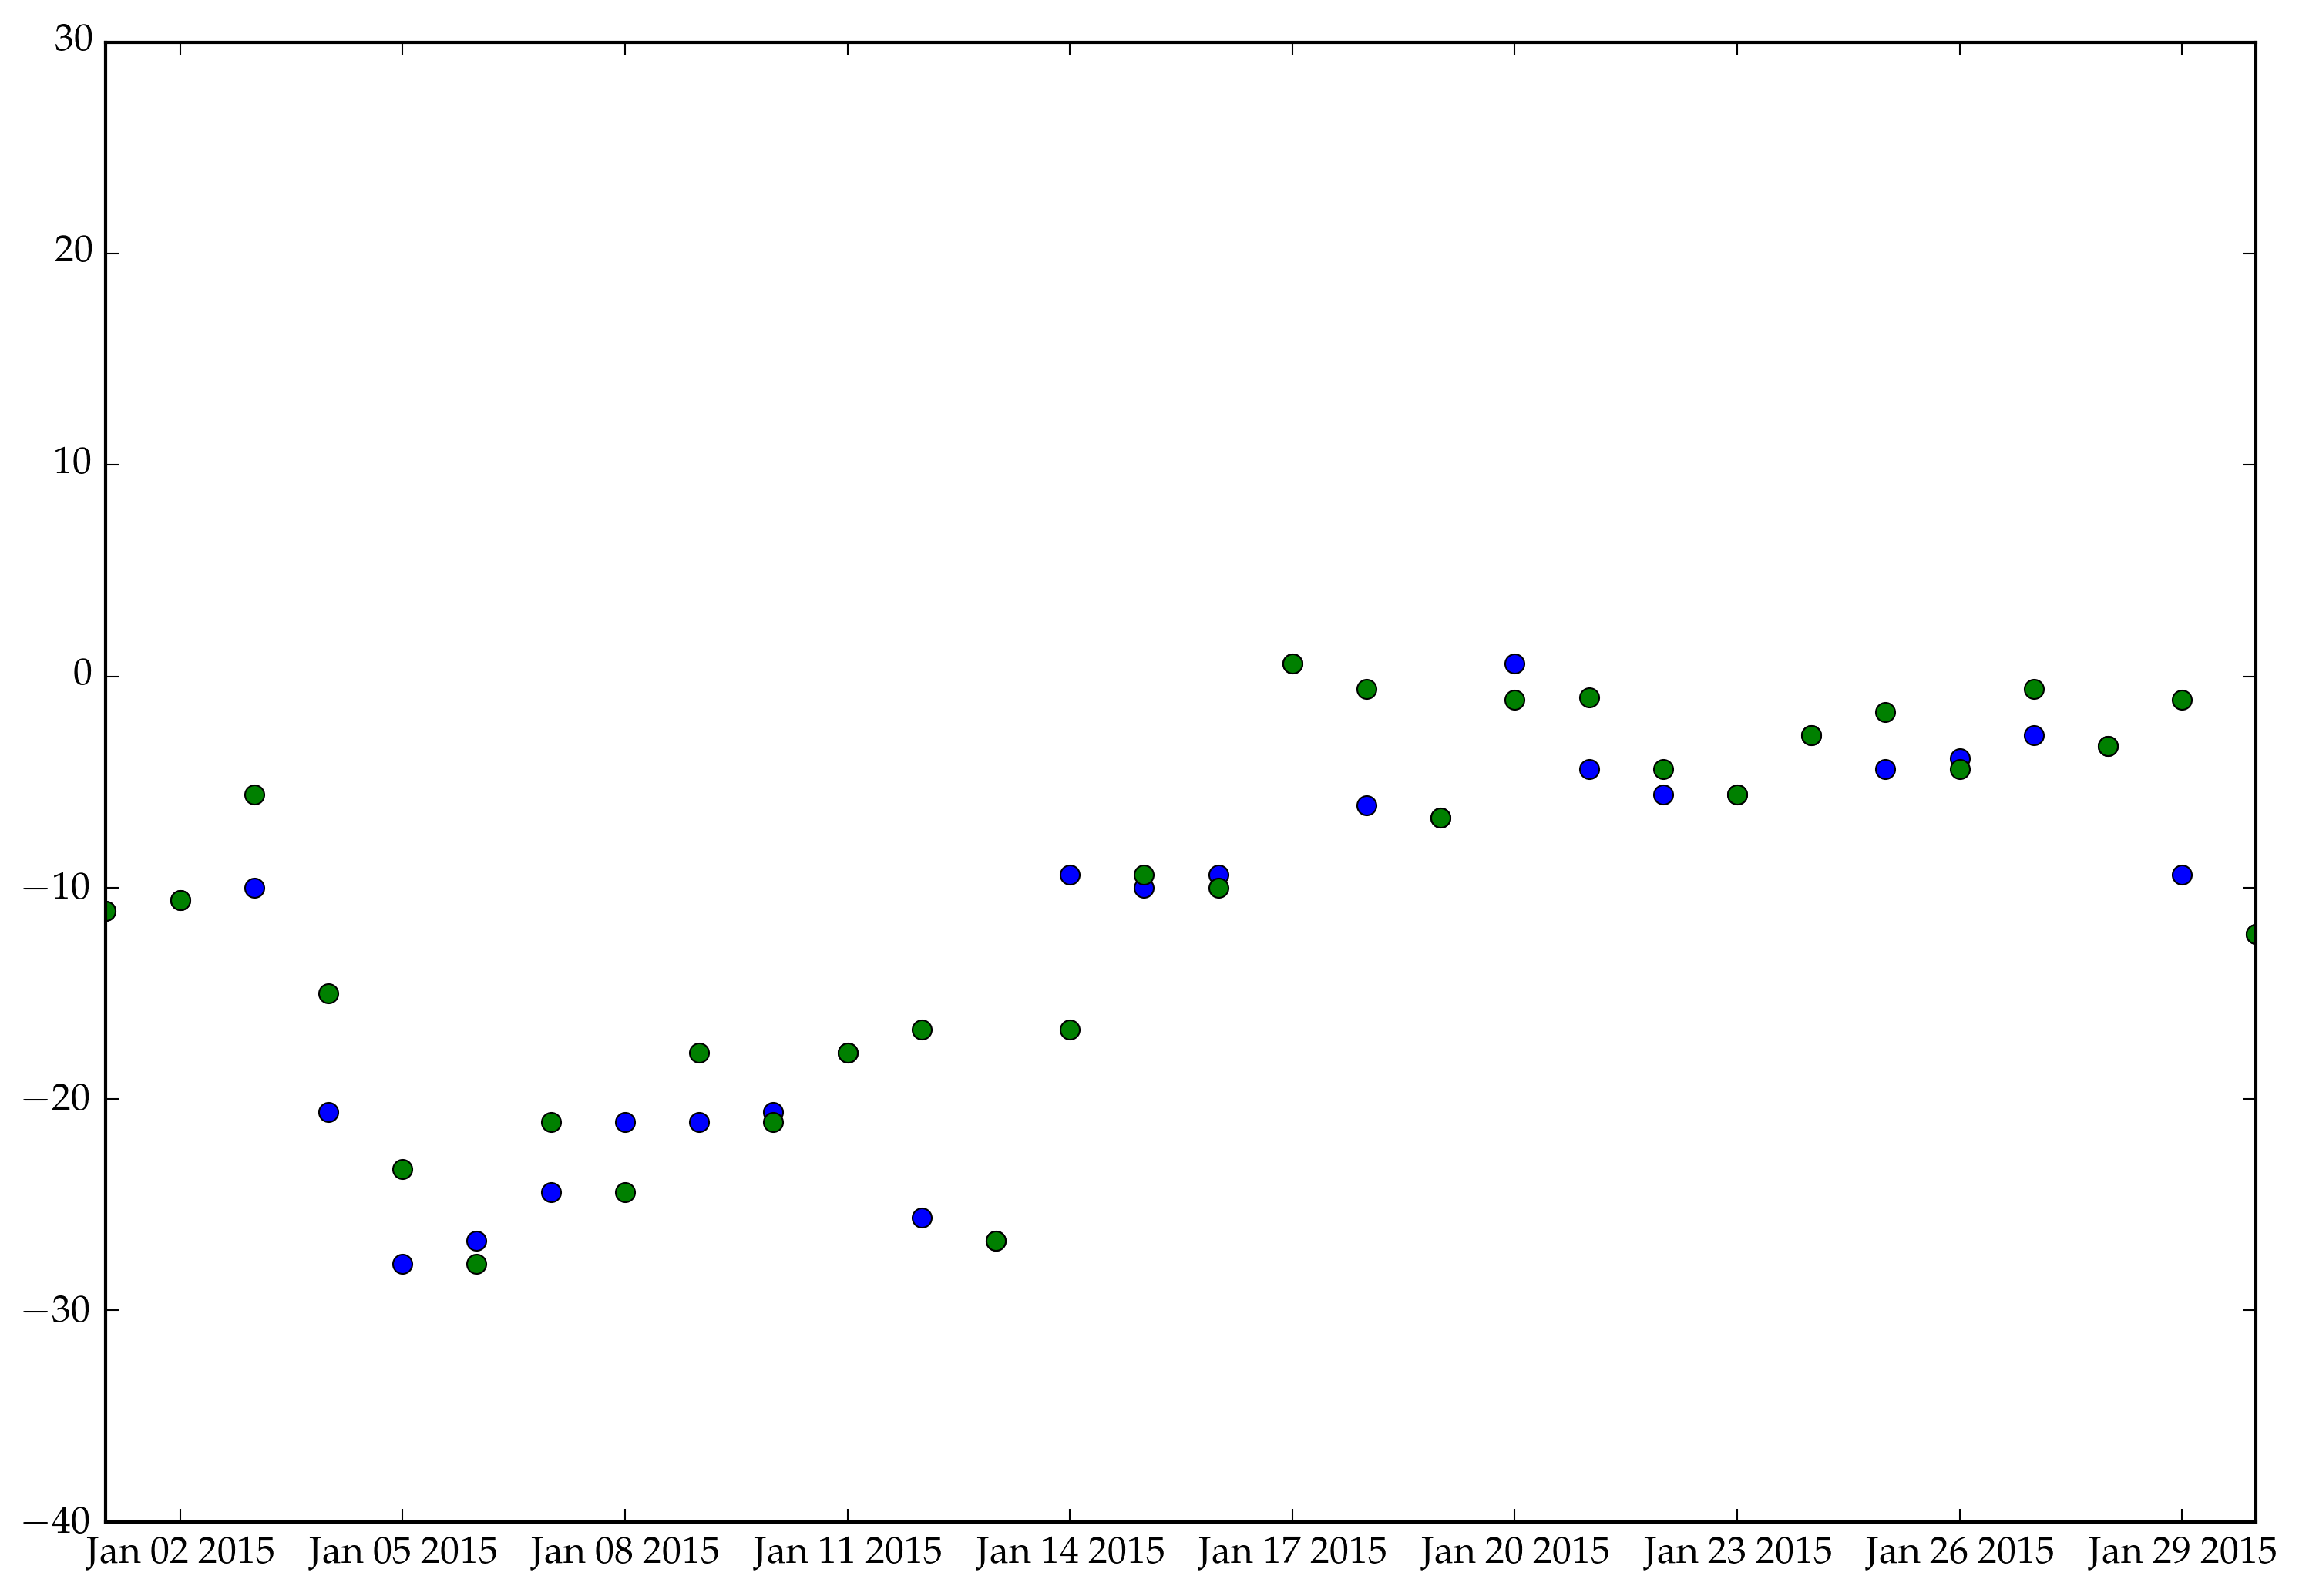

In [60]:
plt.plot(waterloo_TnTx_dict[Hour(10)][:ts_day].values.-Day(1), waterloo_TnTx_dict[Hour(10)][:Tn].values, "o")
plt.plot(waterloo_TnTx_dict[Hour(20)][:ts_day].values, waterloo_TnTx_dict[Hour(20)][:Tn].values, "o")
plt.xlim(DateTime(2015,1,1),DateTime(2015,1,30))
;

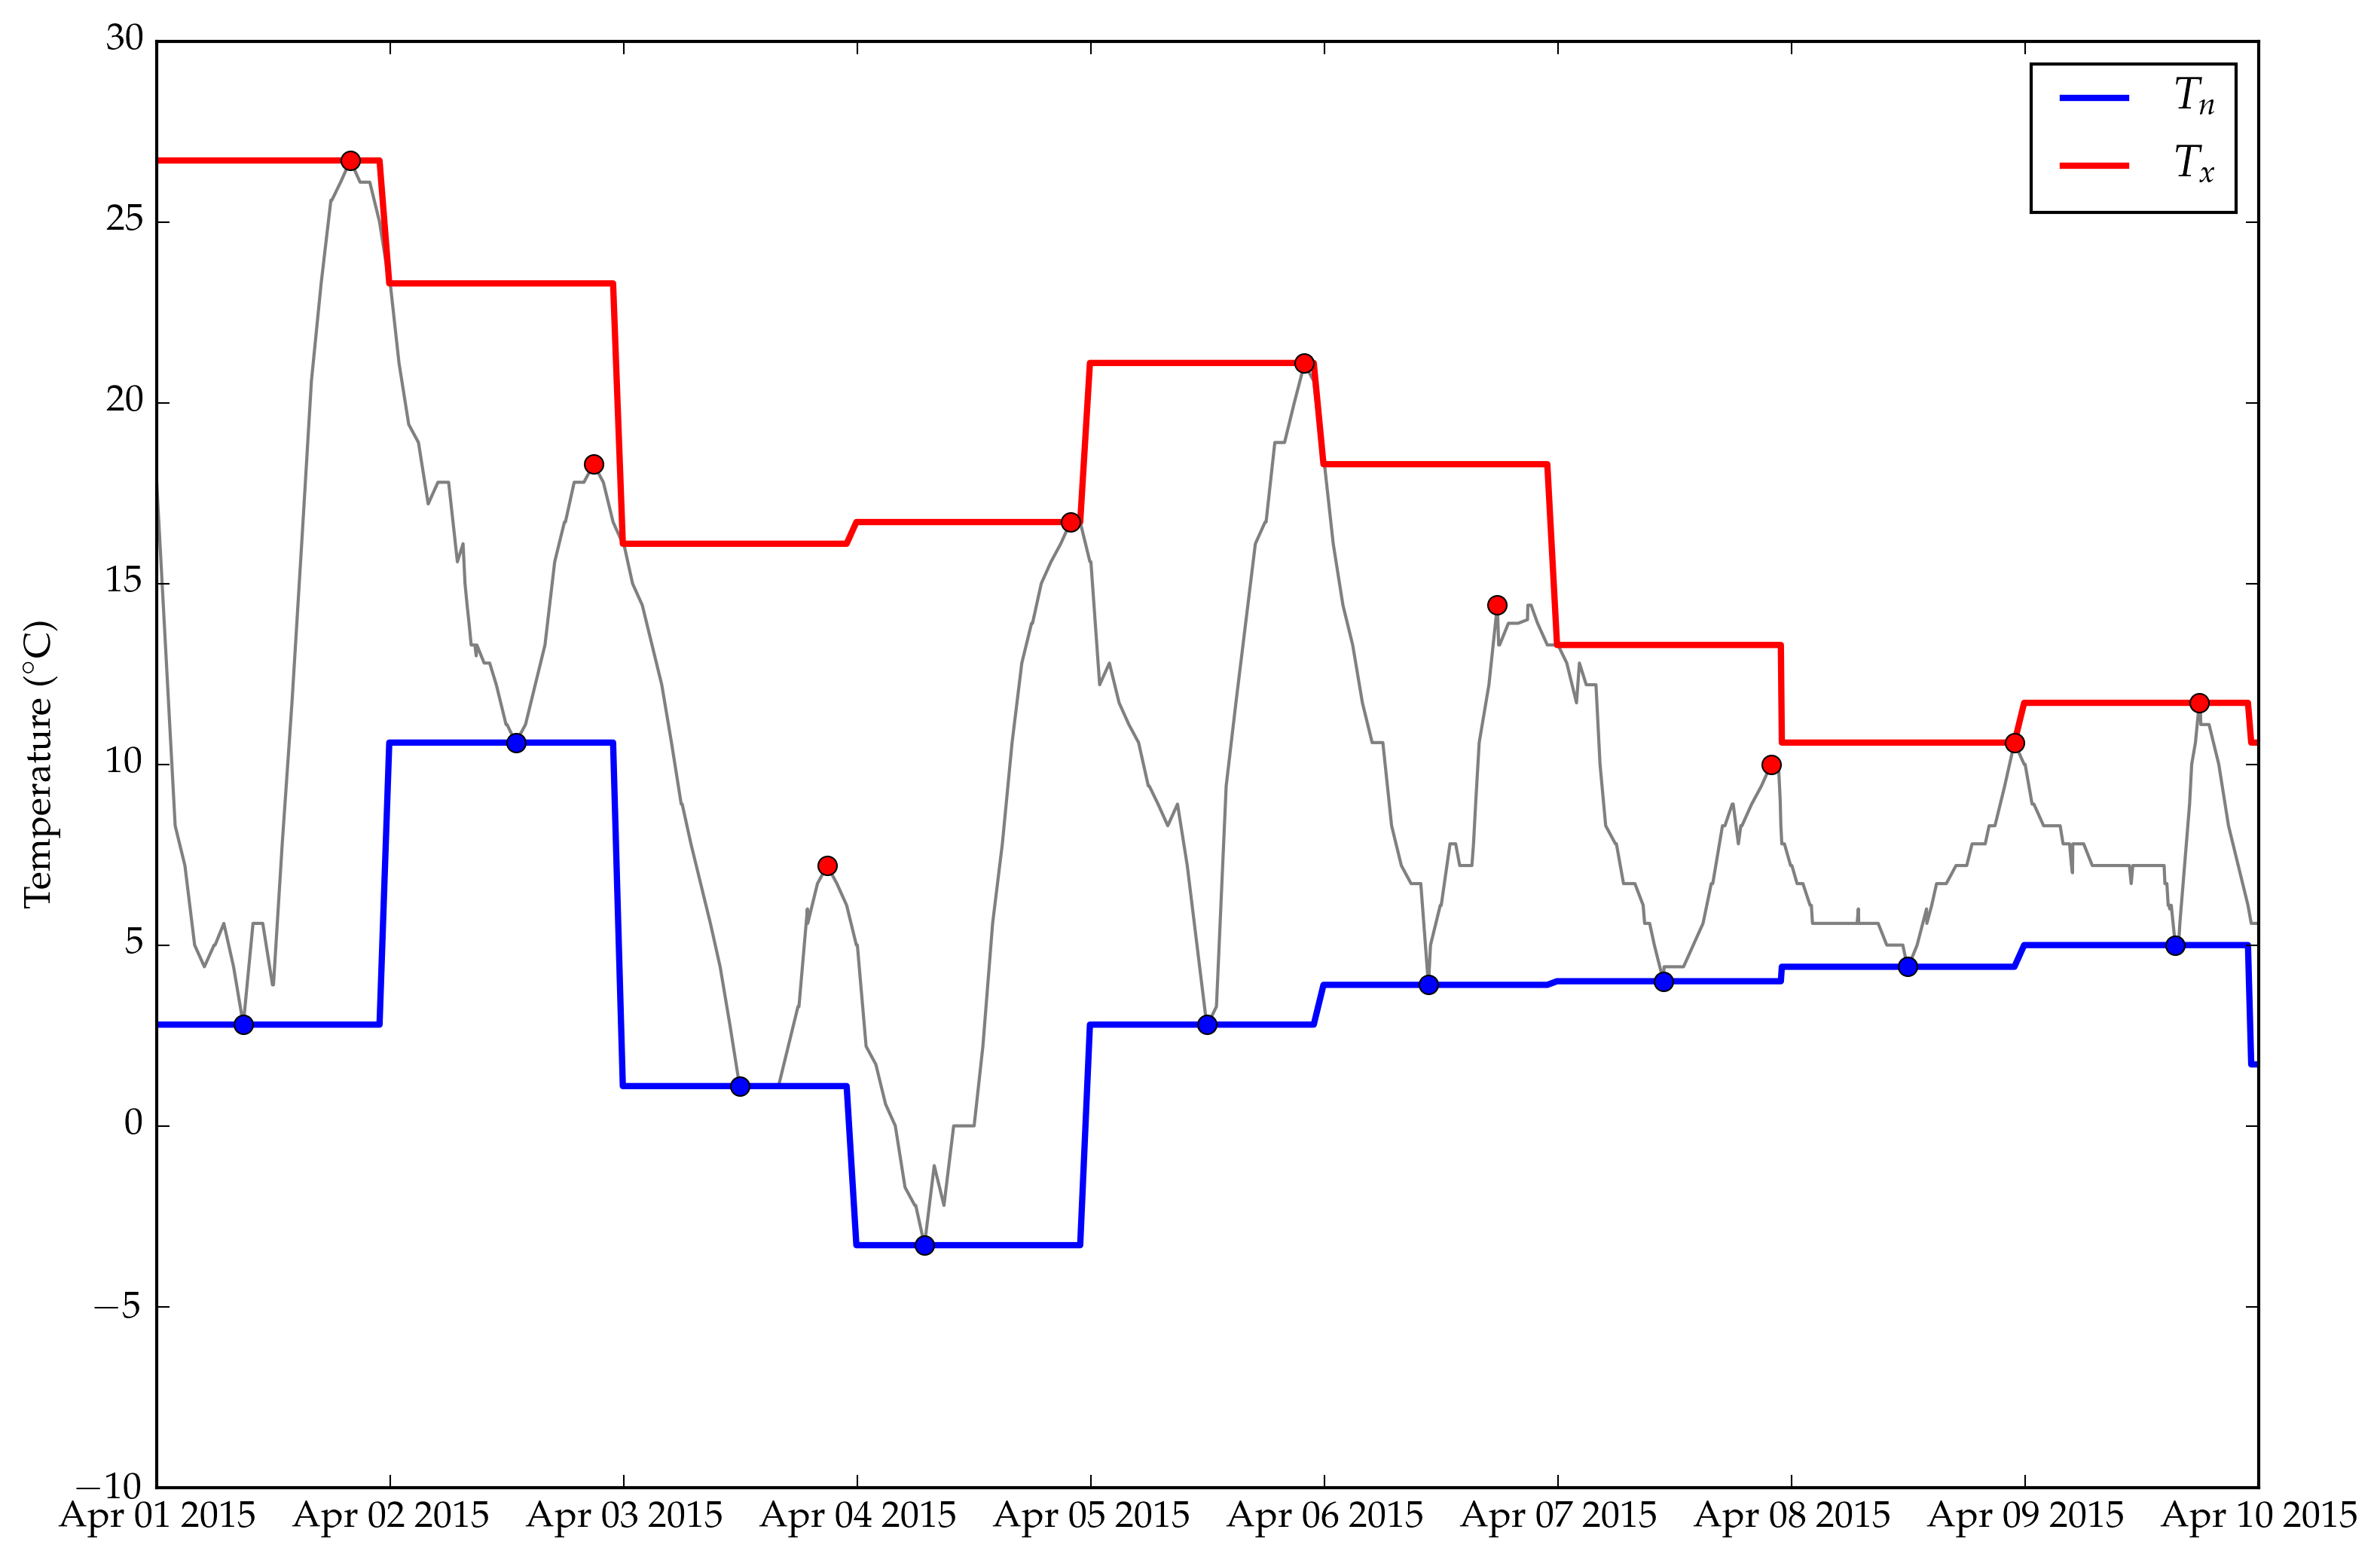

In [77]:
begin
    hr = Hour(23)
    peak = Hour(20)
    low = Hour(8)
    waterloo[:ts_day] = [measurement_date(t,hr) for t in waterloo[:ts].values]
    test_trimmed = join(waterloo, waterloo_TnTx_dict[hr], on=:ts_day)
    plt.plot(test_trimmed[:ts].values, test_trimmed[:temp].values, color="grey")
    plt.plot(test_trimmed[:ts].values, test_trimmed[:Tn].values, color="blue", linewidth=2, label=L"$T_n$")
    plt.plot(test_trimmed[:ts].values, test_trimmed[:Tx].values, color="red", linewidth=2, label=L"$T_x$")
    
    TnTx_low = waterloo_TnTx_dict[low]
    TnTx_peak = waterloo_TnTx_dict[peak]
    
    plt.plot(TnTx_low[:Tx_time].values, TnTx_low[:Tx].values, "o", color="red")
    plt.plot(TnTx_peak[:Tn_time].values, TnTx_peak[:Tn].values, "o", color="blue")
    plt.xlim(DateTime(2015,4,1),DateTime(2015,4,10)) # random interval
    plt.ylim(-10,30)
    plt.ylabel(L"Temperature ($^{\circ}$C)")
    plt.legend()
end;

# Useful metrics

## Average $T_x$ and $T_n$

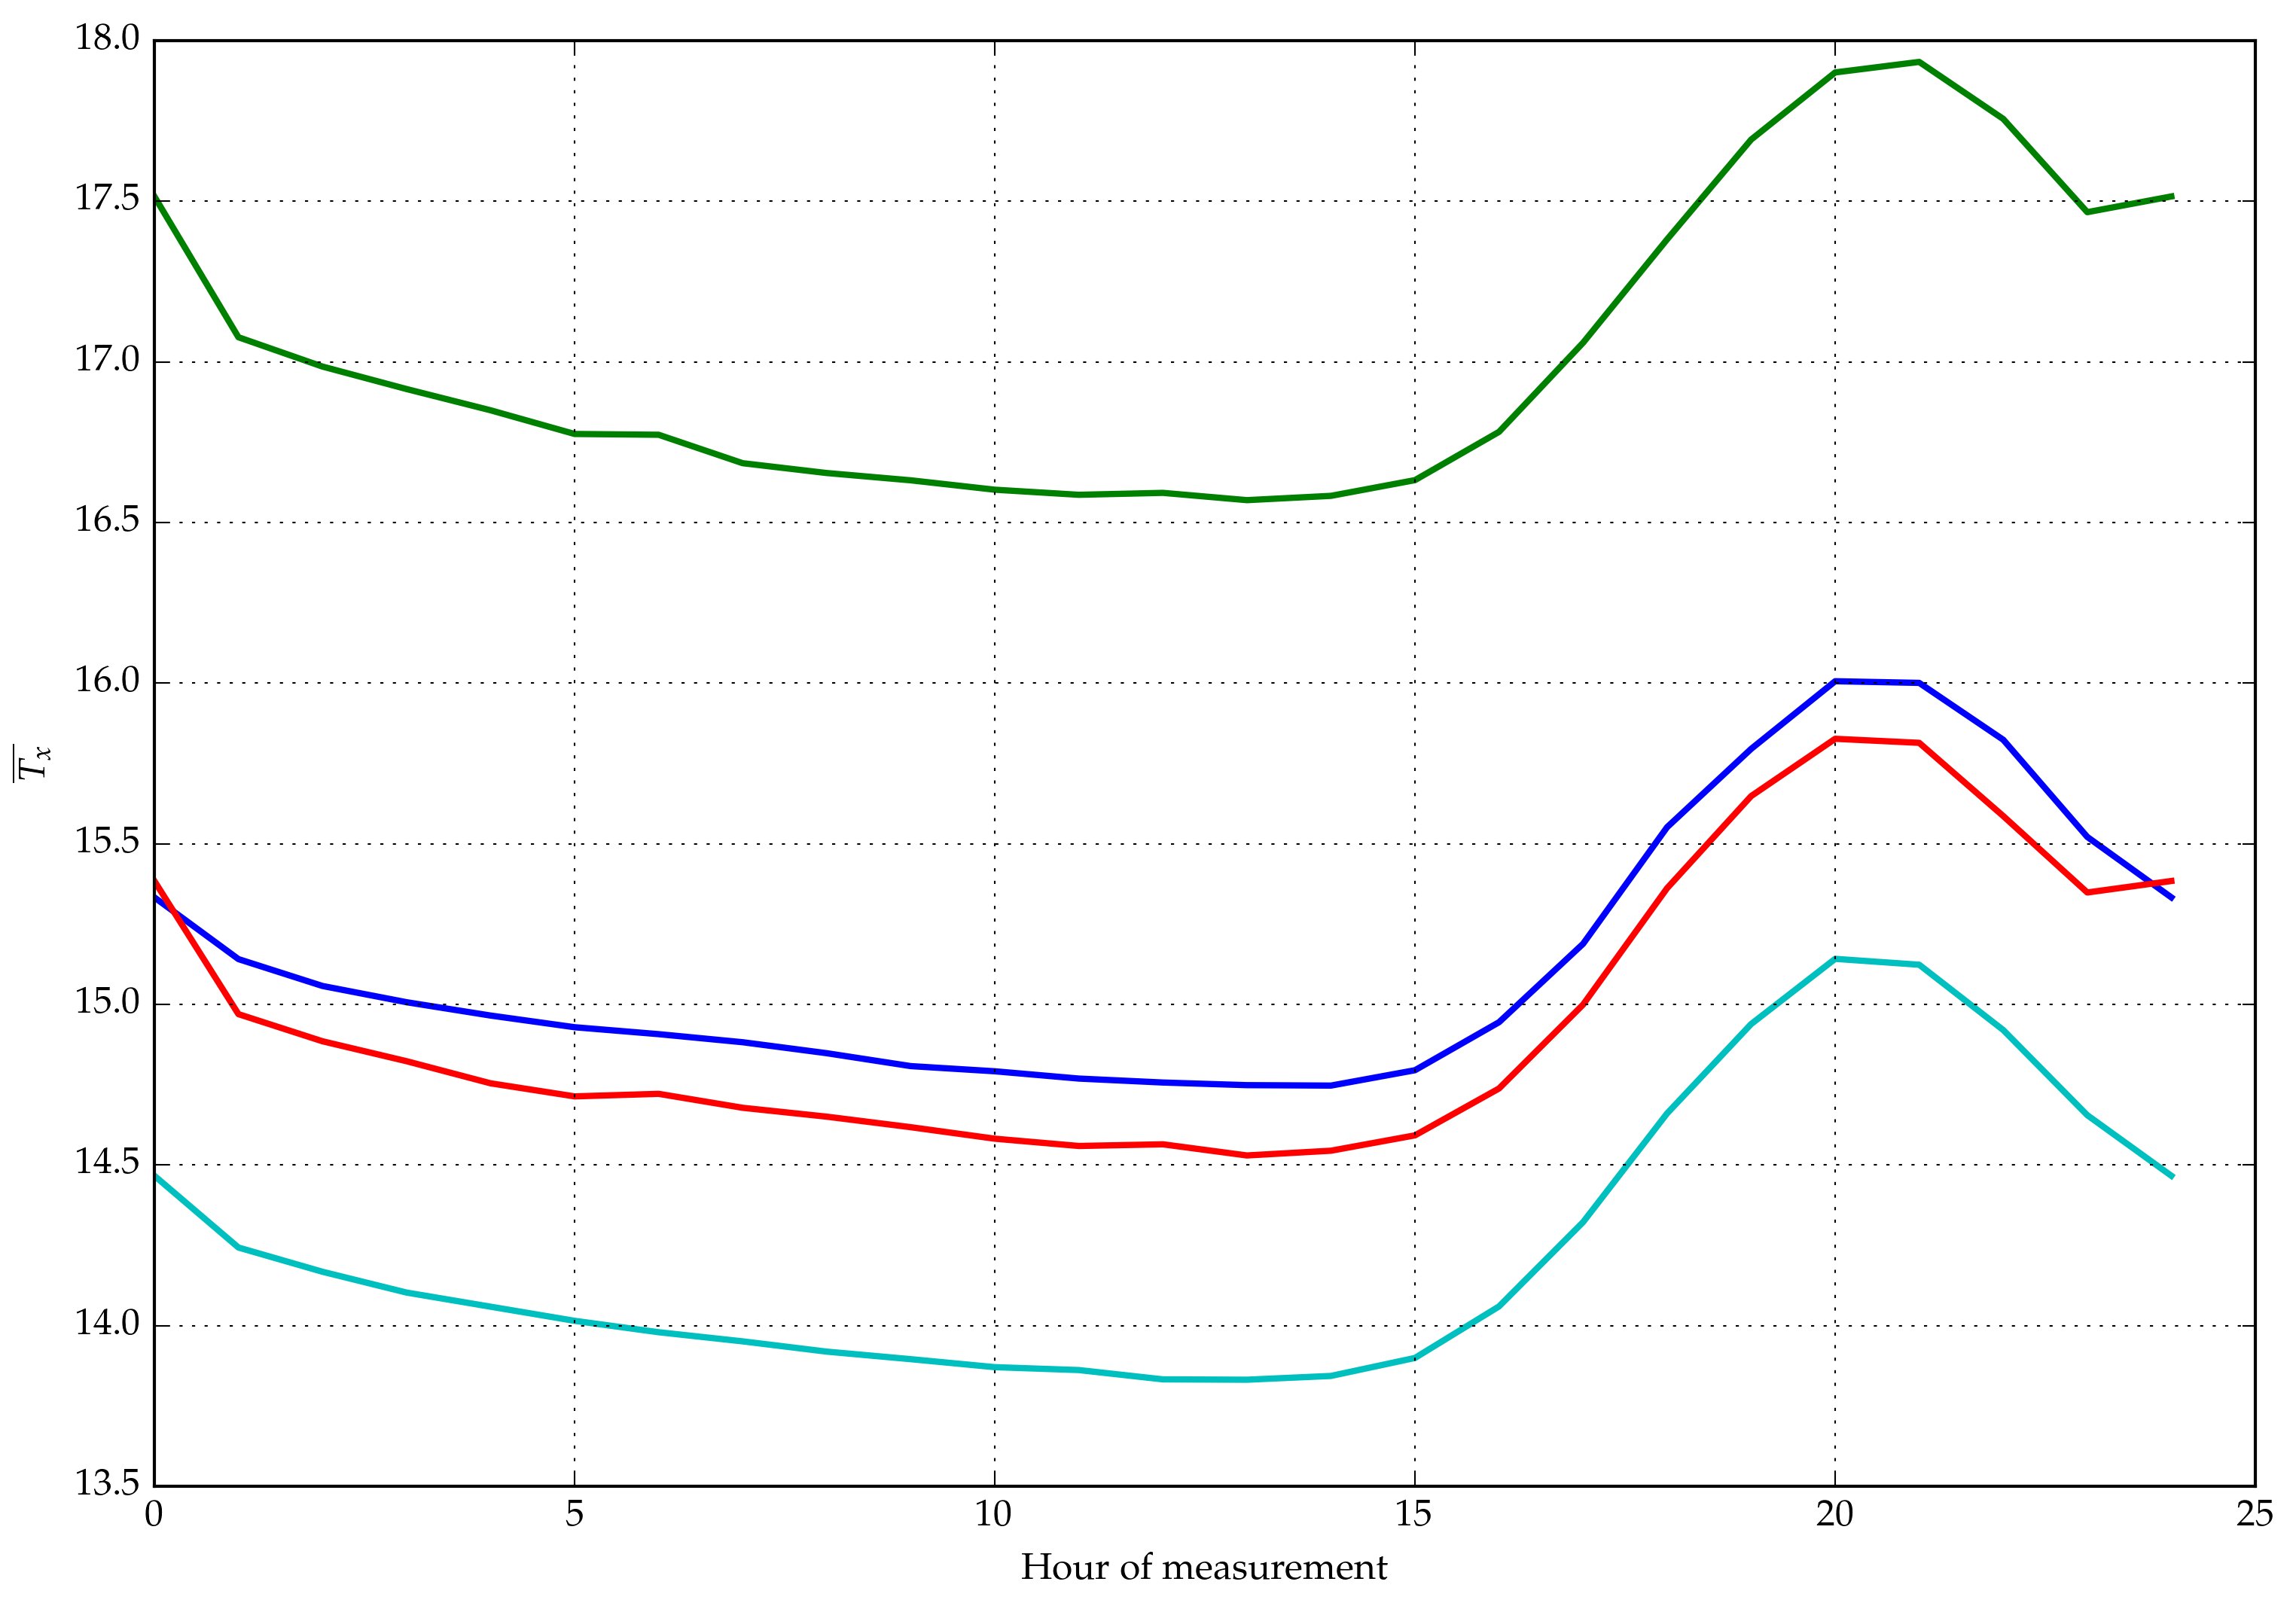

In [9]:
begin
    statdict = Dict{Int64, Vector{Float64}}(
        1=>Float64[],
        2=>Float64[],
        3=>Float64[],
        4=>Float64[]
        )
    for hr in Hour(0):Hour(24)
        hr_mdiff = DataFrames.by(TnTx_dict[hr], :station, 
            df -> mean(df[:Tx].values))
        for station in 1:4
            push!(statdict[station], get(hr_mdiff[station,:x1]))
        end
    end

    for station in 1:4
        plt.plot(0:24, statdict[station], linewidth=2)
#         plt.axhline(maximum(meandiff[station]), color="black")
    end
    plt.ylabel(L"$\overline{T_x}$")
    plt.xlabel("Hour of measurement")
    plt.grid(true)
end

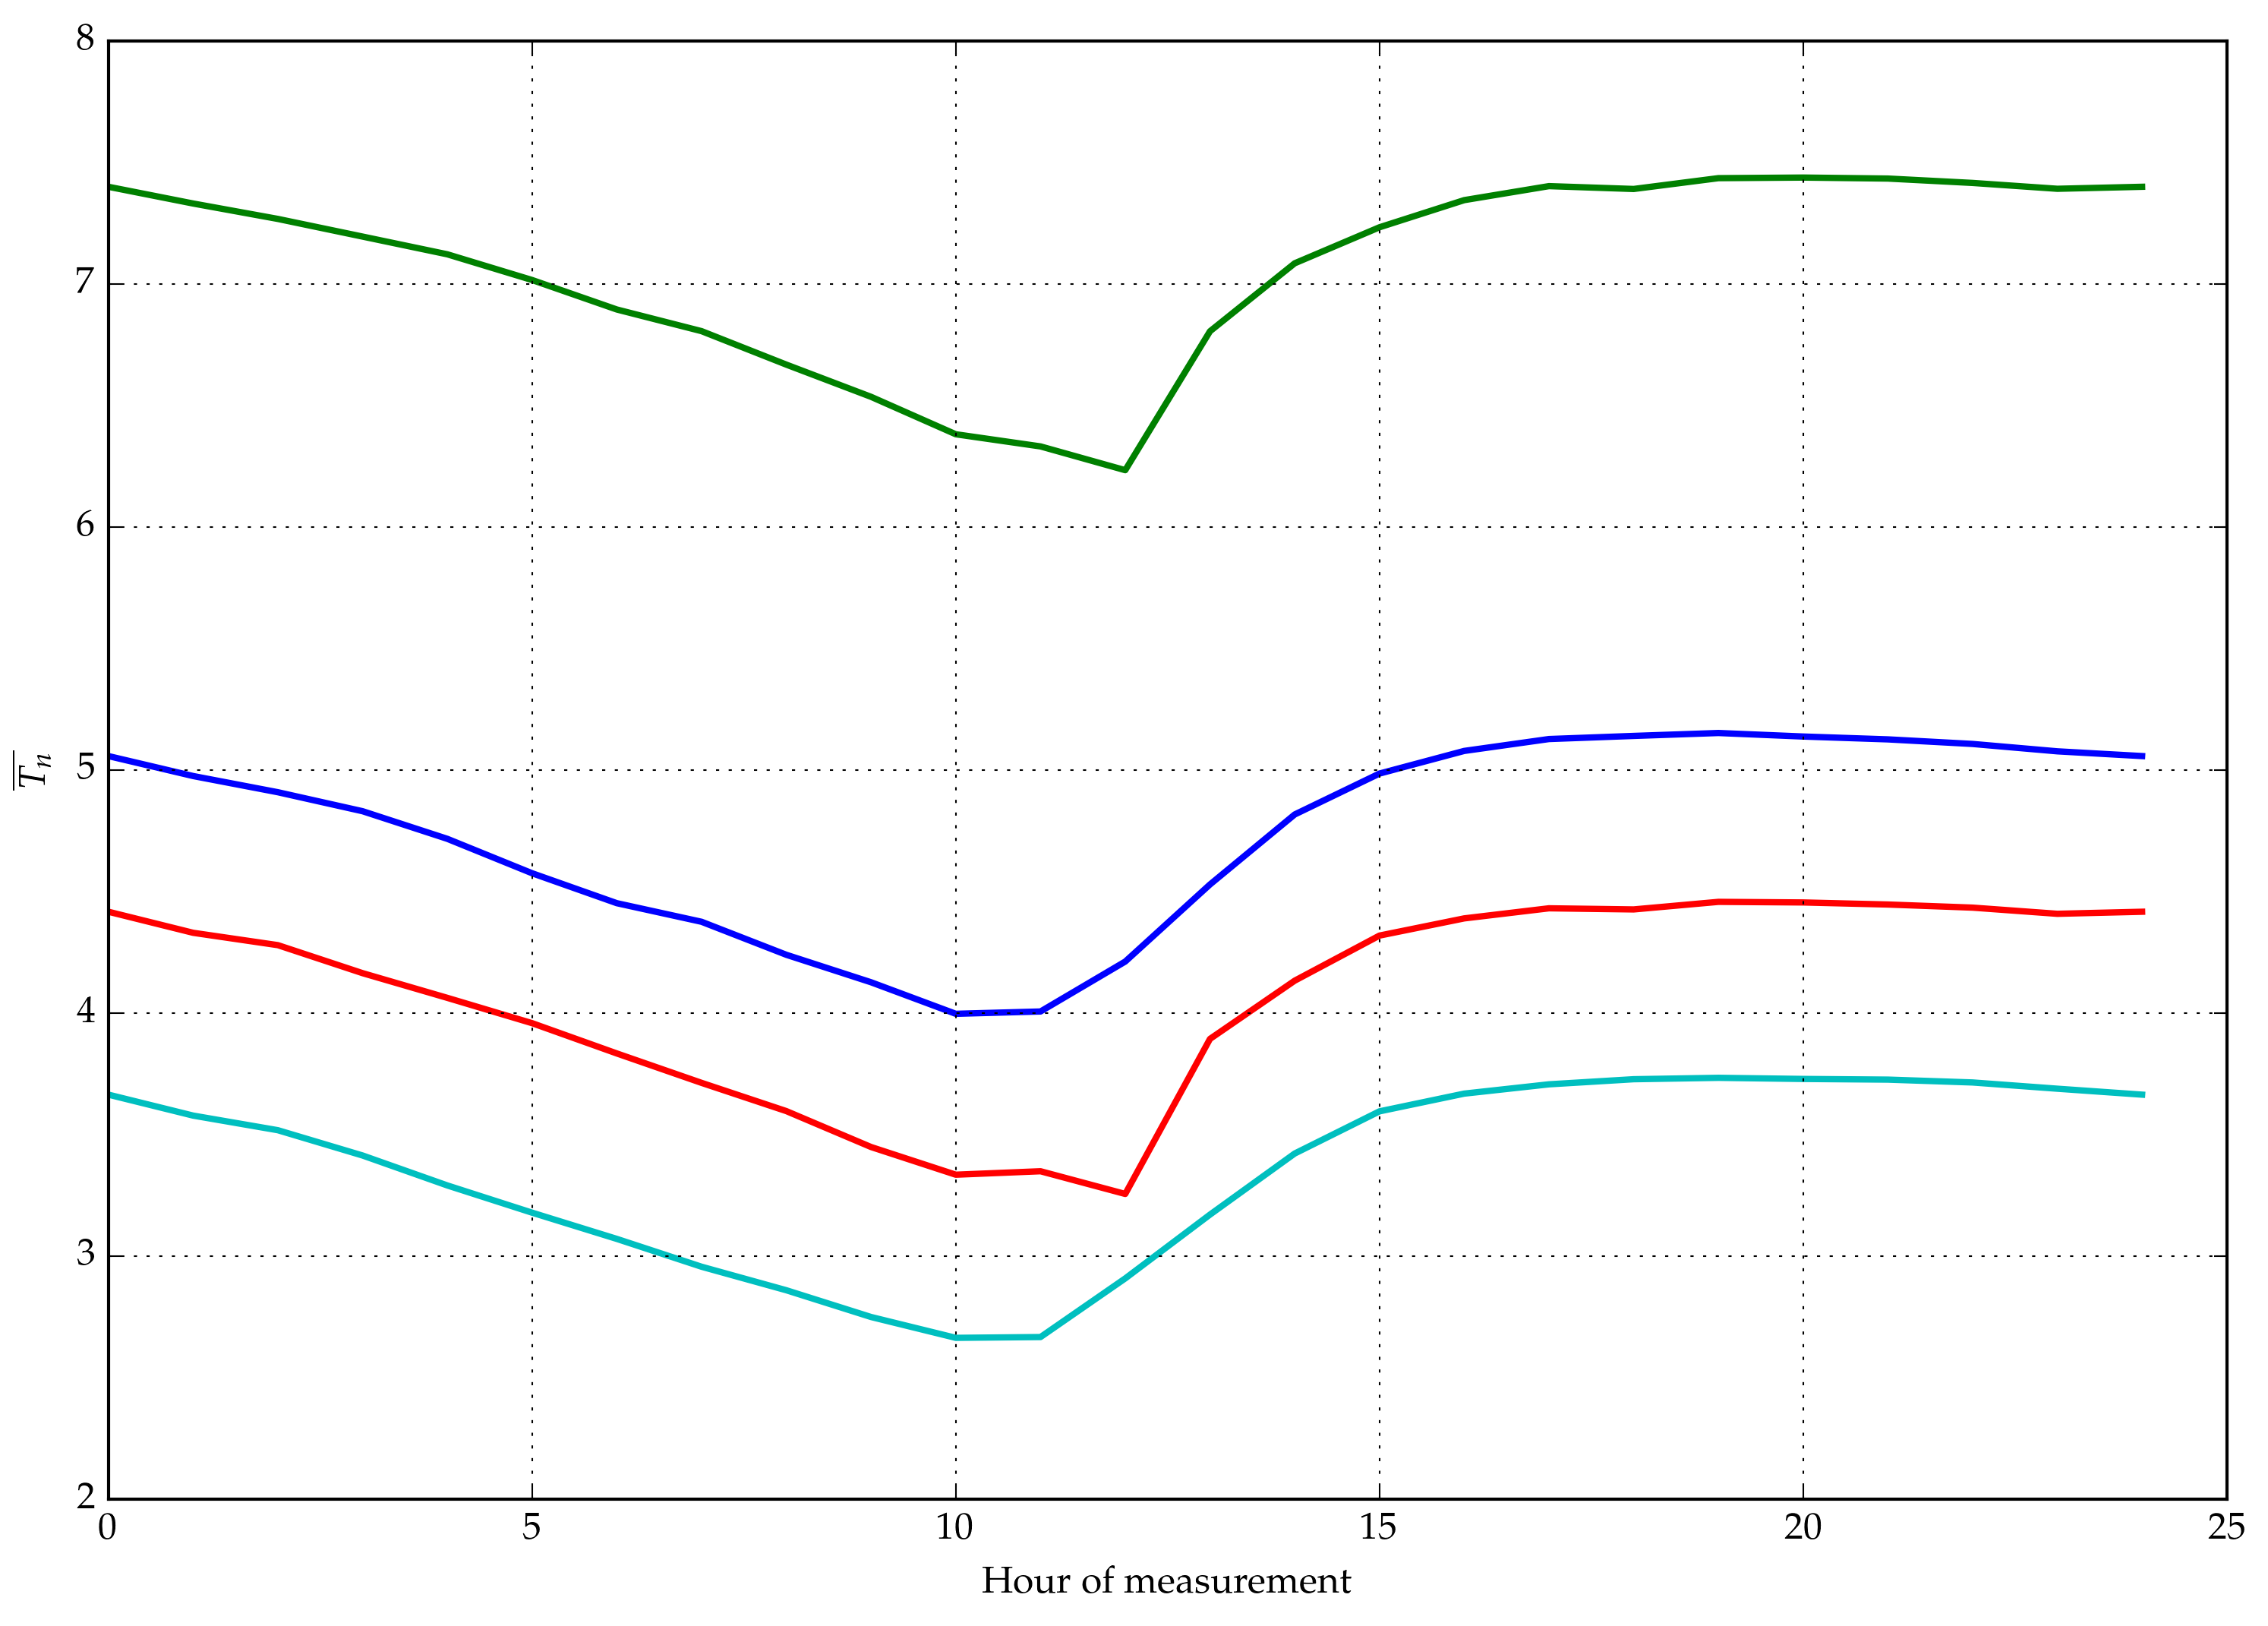

In [10]:
begin
    statdict = Dict{Int64, Vector{Float64}}(
        1=>Float64[],
        2=>Float64[],
        3=>Float64[],
        4=>Float64[]
        )
    for hr in Hour(0):Hour(24)
        hr_mdiff = DataFrames.by(TnTx_dict[hr], :station, 
            df -> mean(df[:Tn].values))
        for station in 1:4
            push!(statdict[station], get(hr_mdiff[station,:x1]))
        end
    end

    for station in 1:4
        plt.plot(0:24, statdict[station], linewidth=2)
#         plt.axhline(maximum(meandiff[station]), color="black")
    end
    plt.ylabel(L"$\overline{T_n}$")
    plt.xlabel("Hour of measurement")
    plt.grid(true)
end

## Mean absolute change in $T_x$ and $T_n$ from one day to the next

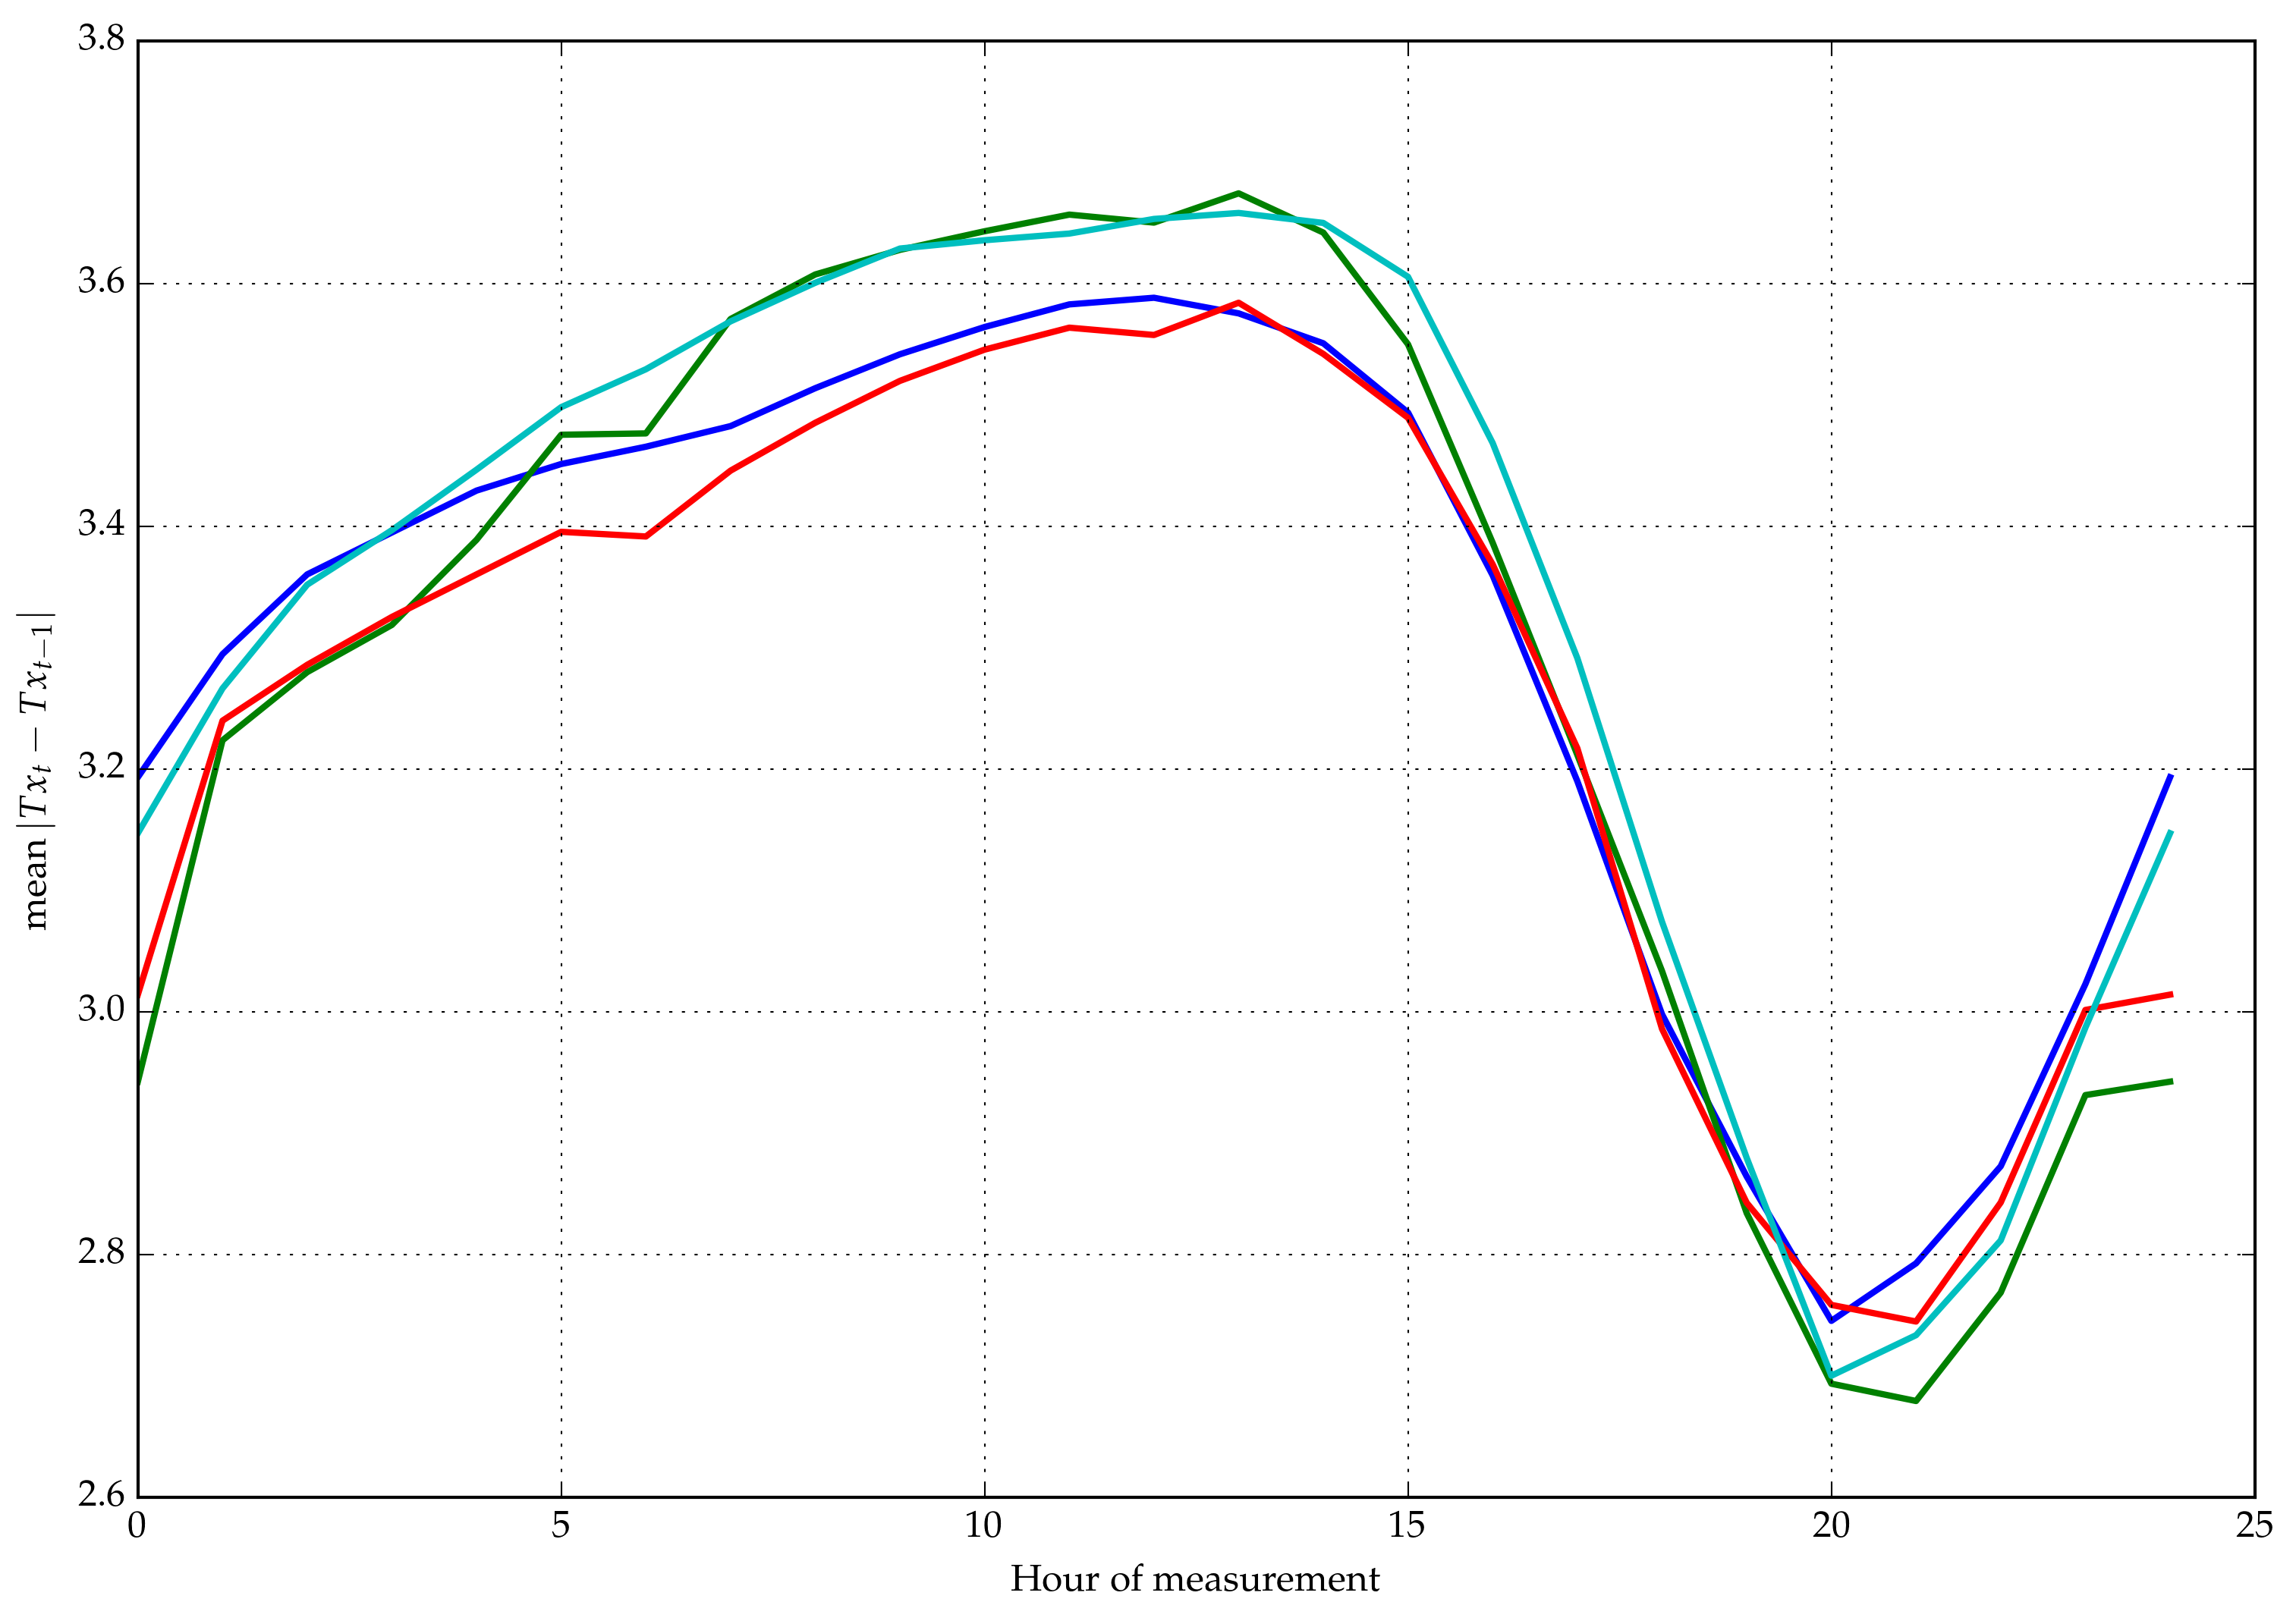

In [11]:
begin
    meandiff = Dict{Int64, Vector{Float64}}(
        1=>Float64[],
        2=>Float64[],
        3=>Float64[],
        4=>Float64[]
        )
    for hr in Hour(0):Hour(24)
        hr_mdiff = DataFrames.by(TnTx_dict[hr], :station, 
            df -> mean(abs(diff(df[:Tx].values))))
        for station in 1:4
            push!(meandiff[station], get(hr_mdiff[station,:x1]))
        end
    end

    for station in 1:4
        plt.plot(0:24, meandiff[station], linewidth=2)
    end
    plt.ylabel(L"$\mathrm{mean}\left| Tx_{t}-Tx_{t-1} \right|$")
    plt.xlabel("Hour of measurement")
    plt.grid()
end;

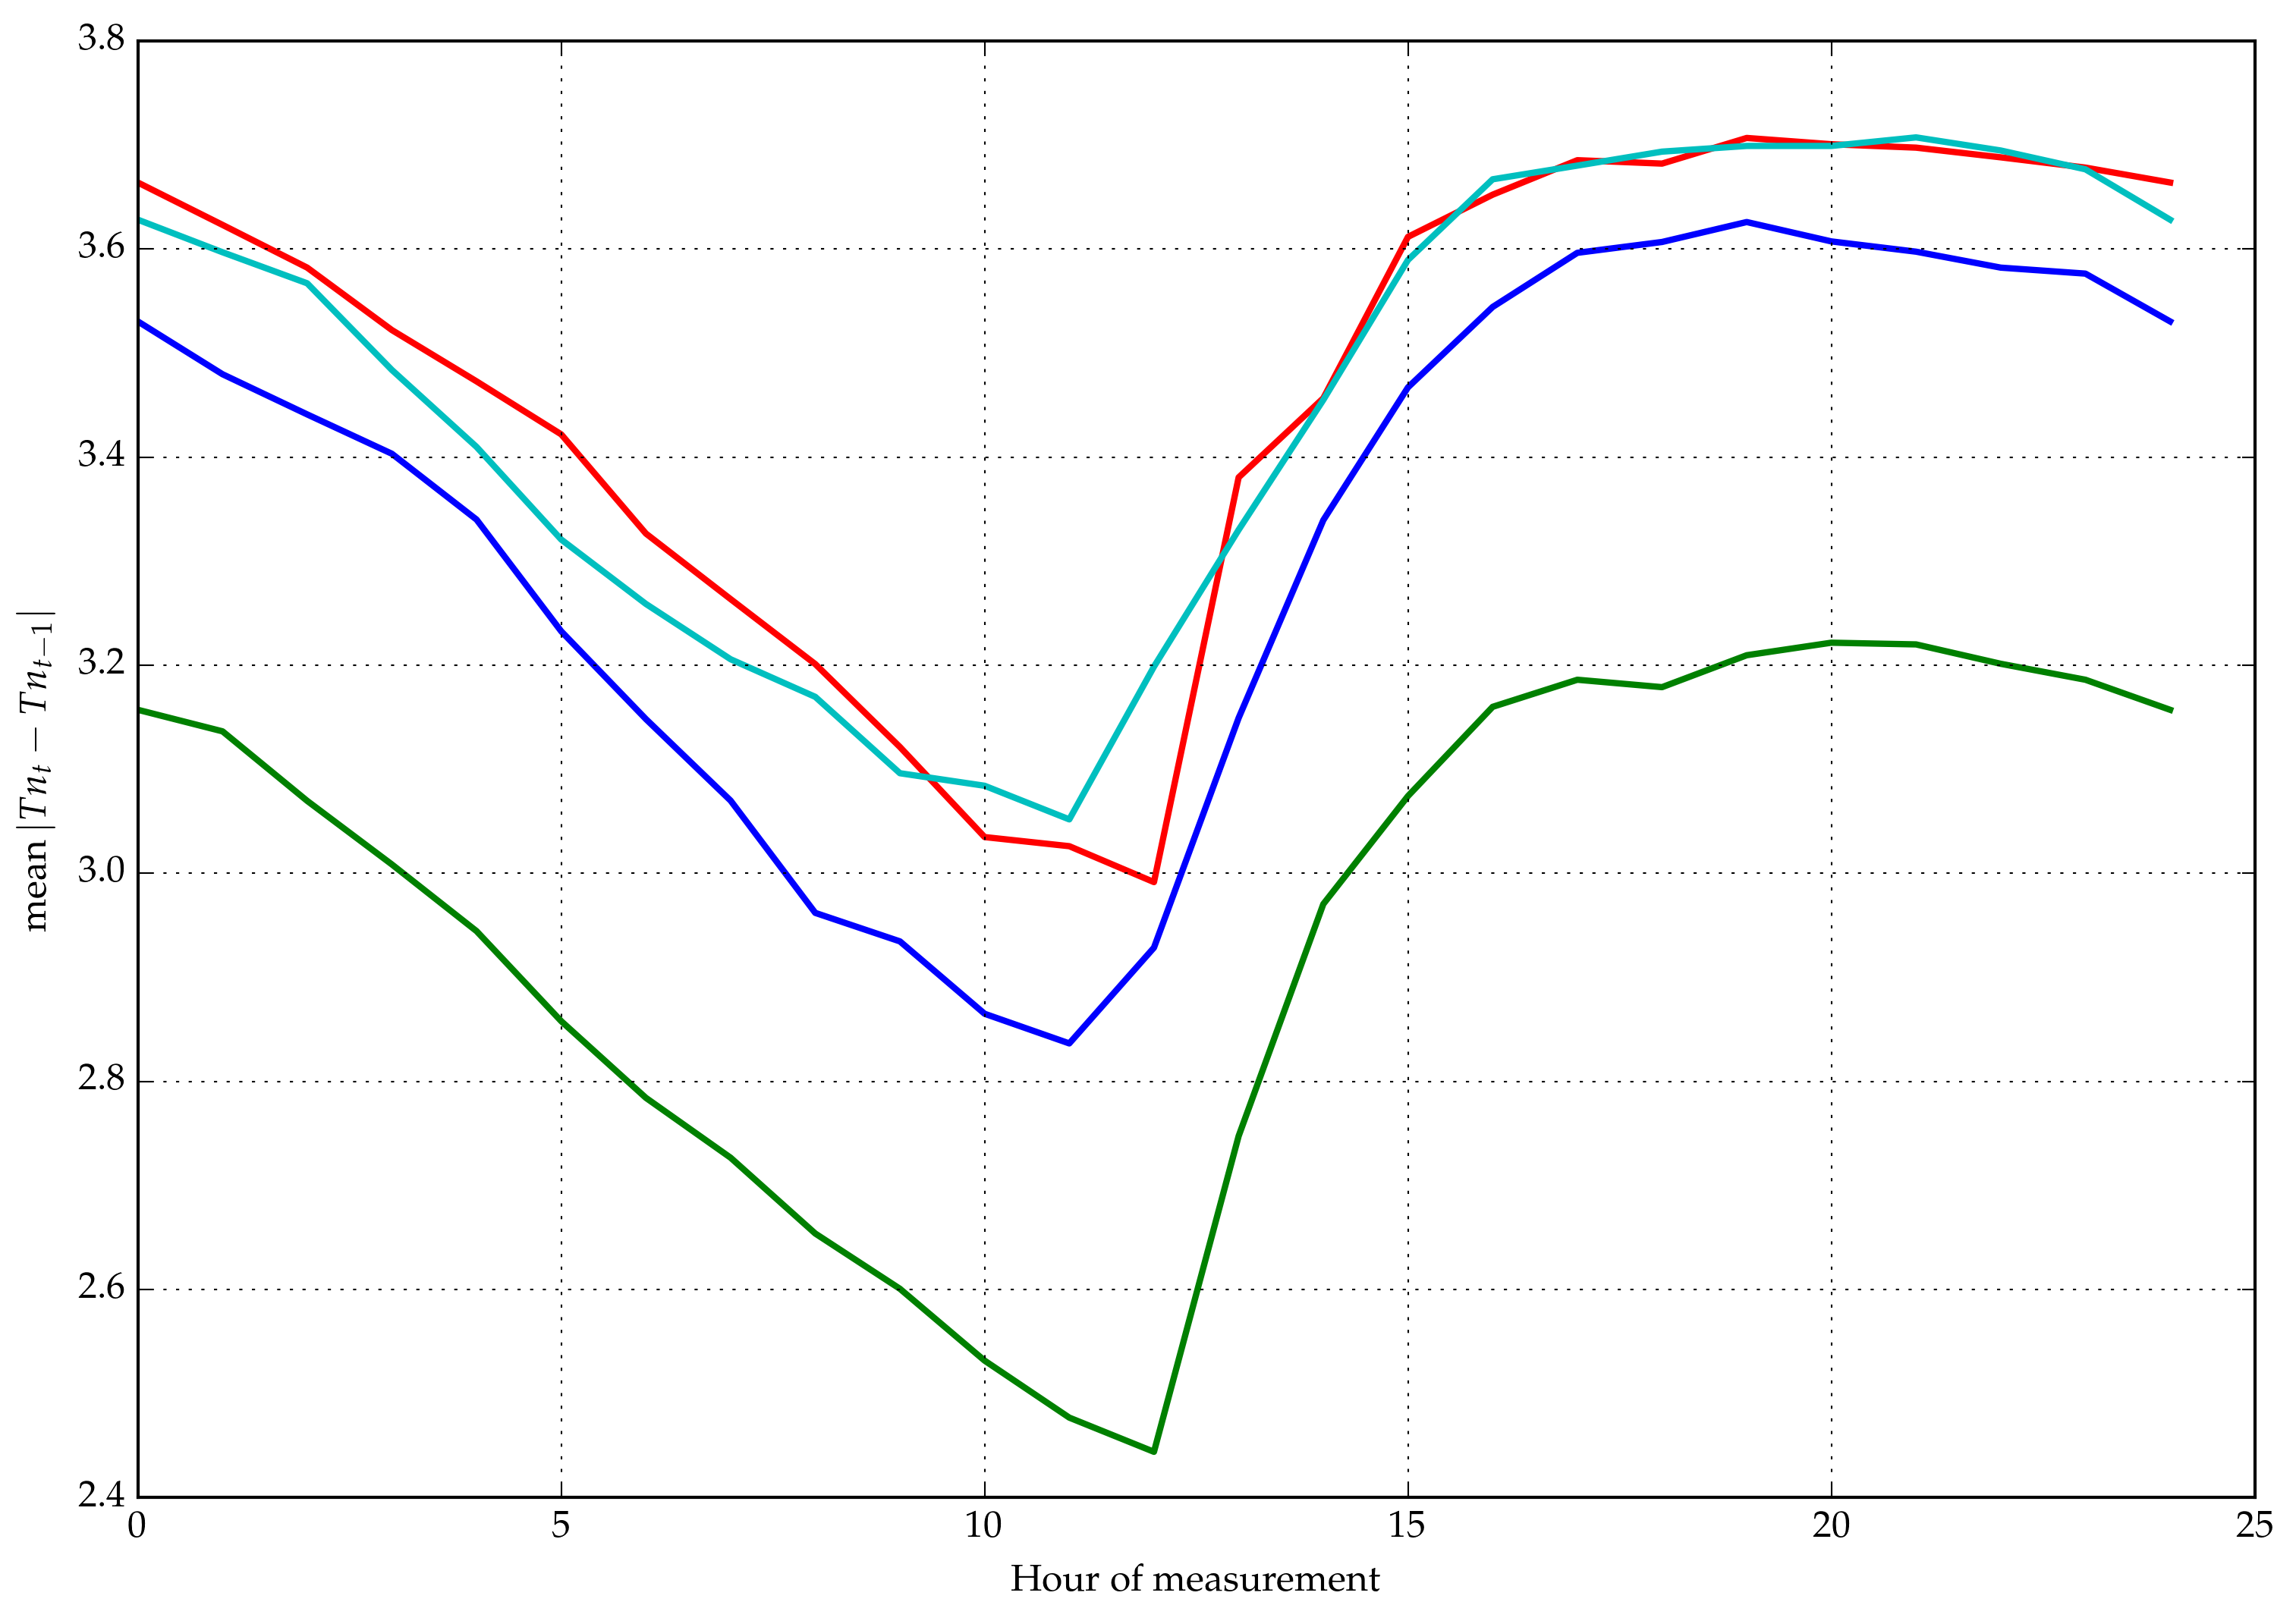

In [19]:
begin
    meandiff = Dict{Int64, Vector{Float64}}(
        1=>Float64[],
        2=>Float64[],
        3=>Float64[],
        4=>Float64[]
        )
    for hr in Hour(0):Hour(24)
        hr_mdiff = DataFrames.by(TnTx_dict[hr], :station, 
            df -> mean(abs(diff(df[:Tn].values))))
        for station in 1:4
            push!(meandiff[station], get(hr_mdiff[station,:x1]))
        end
    end

    for station in 1:4
        plt.plot(0:24, meandiff[station], linewidth=2)
#         plt.axhline(maximum(meandiff[station]), color="black")
    end
    plt.ylabel(L"$\mathrm{mean}\left| Tn_{t}-Tn_{t-1} \right|$")
    plt.xlabel("Hour of measurement")
    plt.grid(true)
end;

## Standard deviation of change in $T_x$ and $T_n$ from one day to the next

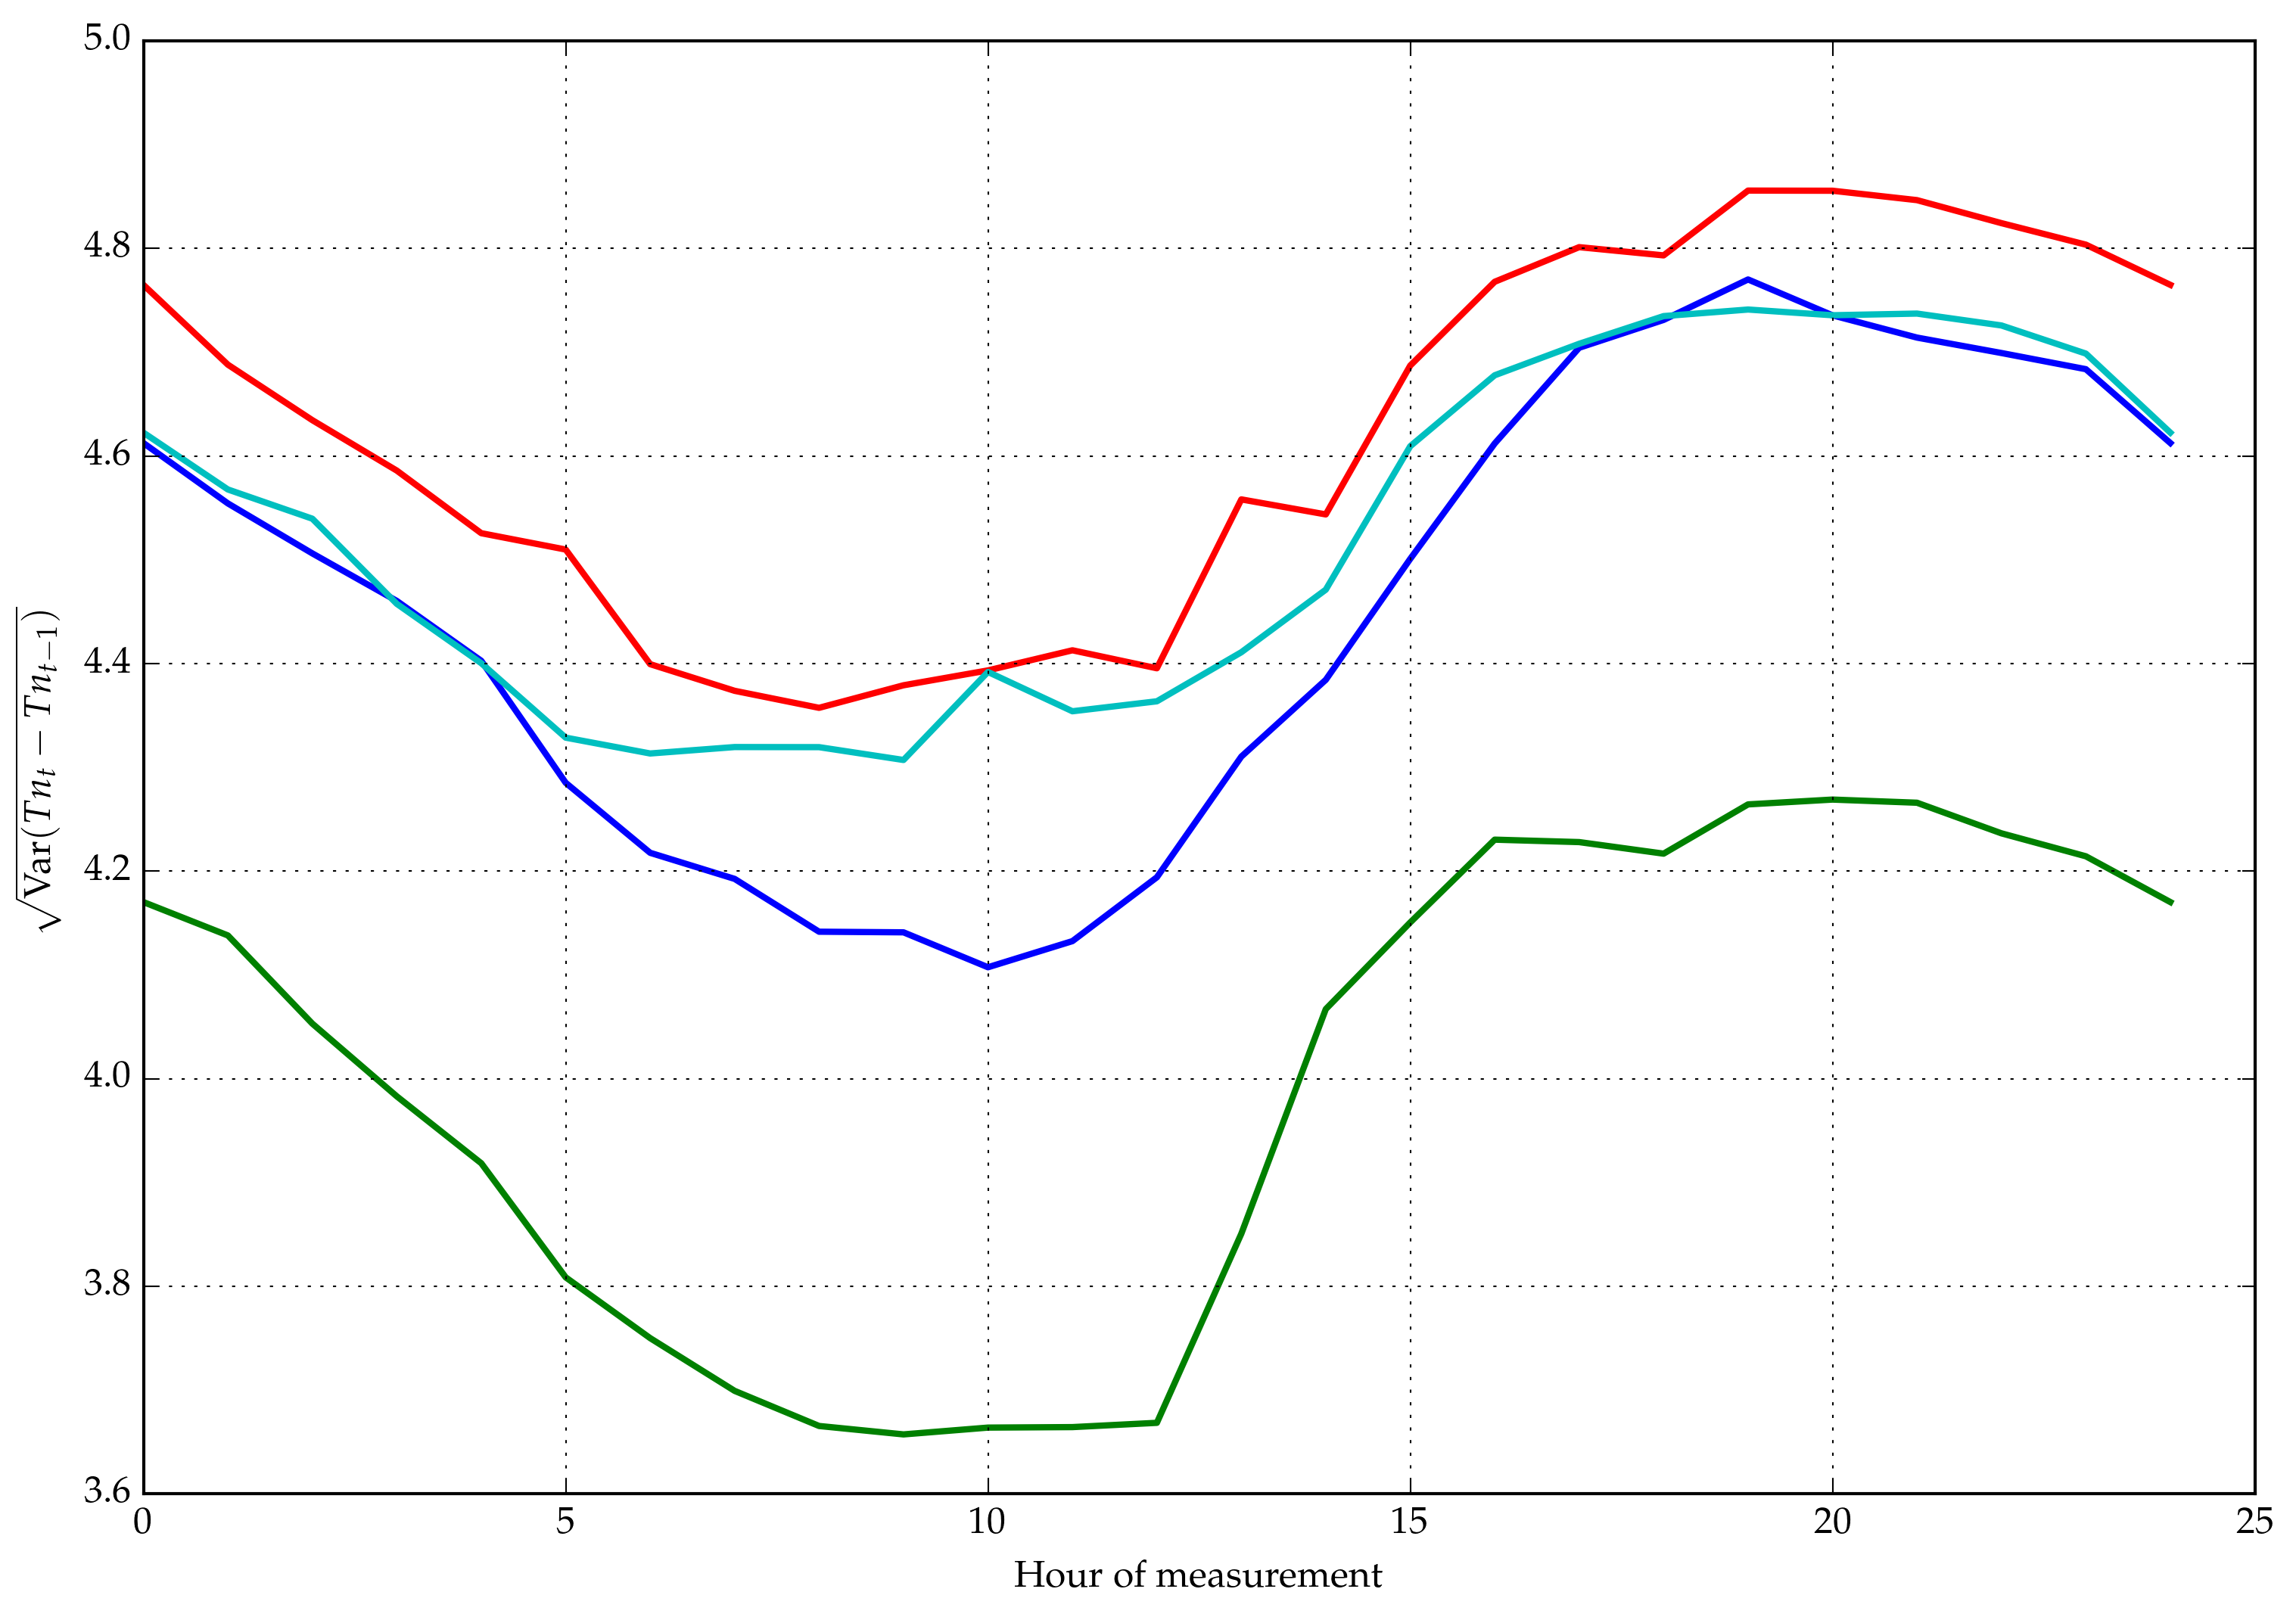

In [13]:
begin
    meandiff = Dict{Int64, Vector{Float64}}(
        1=>Float64[],
        2=>Float64[],
        3=>Float64[],
        4=>Float64[]
        )
    for hr in Hour(0):Hour(24)
        hr_mdiff = DataFrames.by(TnTx_dict[hr], :station, 
            df -> std(diff(df[:Tn].values)))
        for station in 1:4
            push!(meandiff[station], get(hr_mdiff[station,:x1]))
        end
    end

    for station in 1:4
        plt.plot(0:24, meandiff[station], linewidth=2)
#         plt.axhline(maximum(meandiff[station]), color="black")
    end
    plt.ylabel(L"$\sqrt{\mathrm{Var}({Tn_{t}-Tn_{t-1}})}$")
    plt.xlabel("Hour of measurement")
    plt.grid(true)
end;

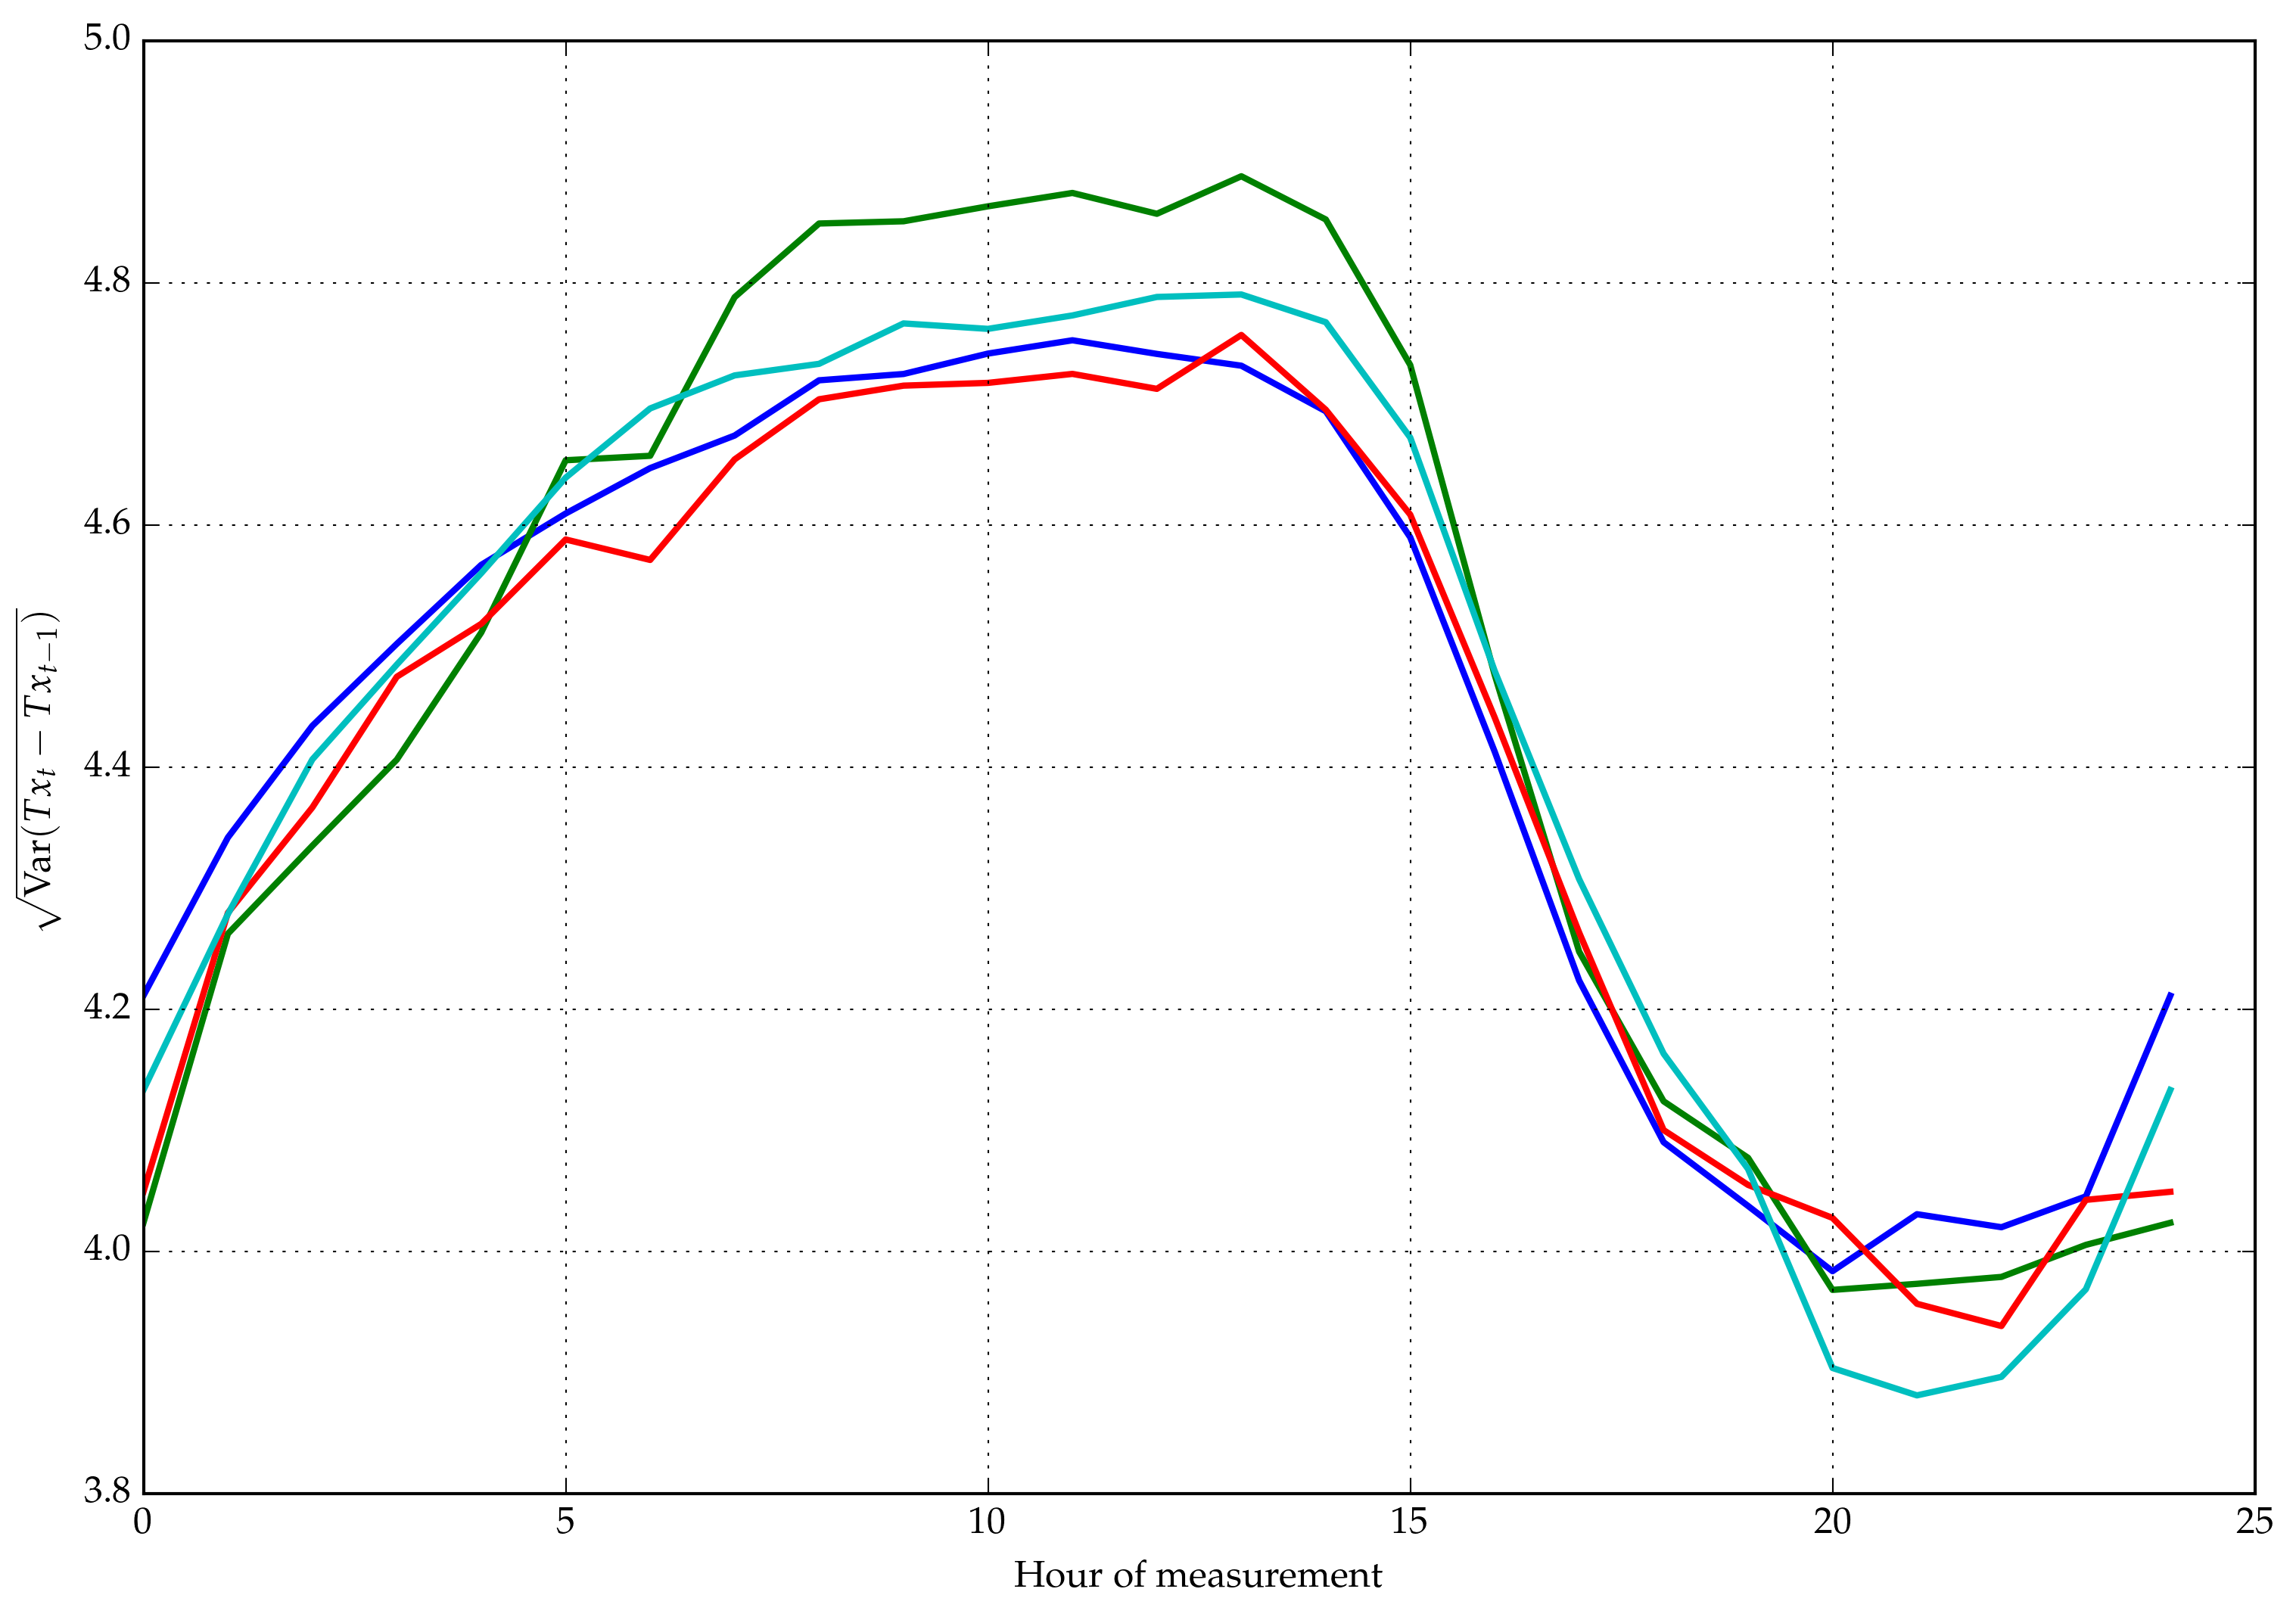

In [14]:
begin
    meandiff = Dict{Int64, Vector{Float64}}(
        1=>Float64[],
        2=>Float64[],
        3=>Float64[],
        4=>Float64[]
        )
    for hr in Hour(0):Hour(24)
        hr_mdiff = DataFrames.by(TnTx_dict[hr], :station, 
            df -> std(diff(df[:Tx].values)))
        for station in 1:4
            push!(meandiff[station], get(hr_mdiff[station,:x1]))
        end
    end

    for station in 1:4
        plt.plot(0:24, meandiff[station], linewidth=2)
#         plt.axhline(maximum(meandiff[station]), color="black")
    end
    plt.ylabel(L"$\sqrt{\mathrm{Var}({Tx_{t}-Tx_{t-1}})}$")
    plt.xlabel("Hour of measurement")
    plt.grid(true)
end

# Metrics that turned out to be less insightful

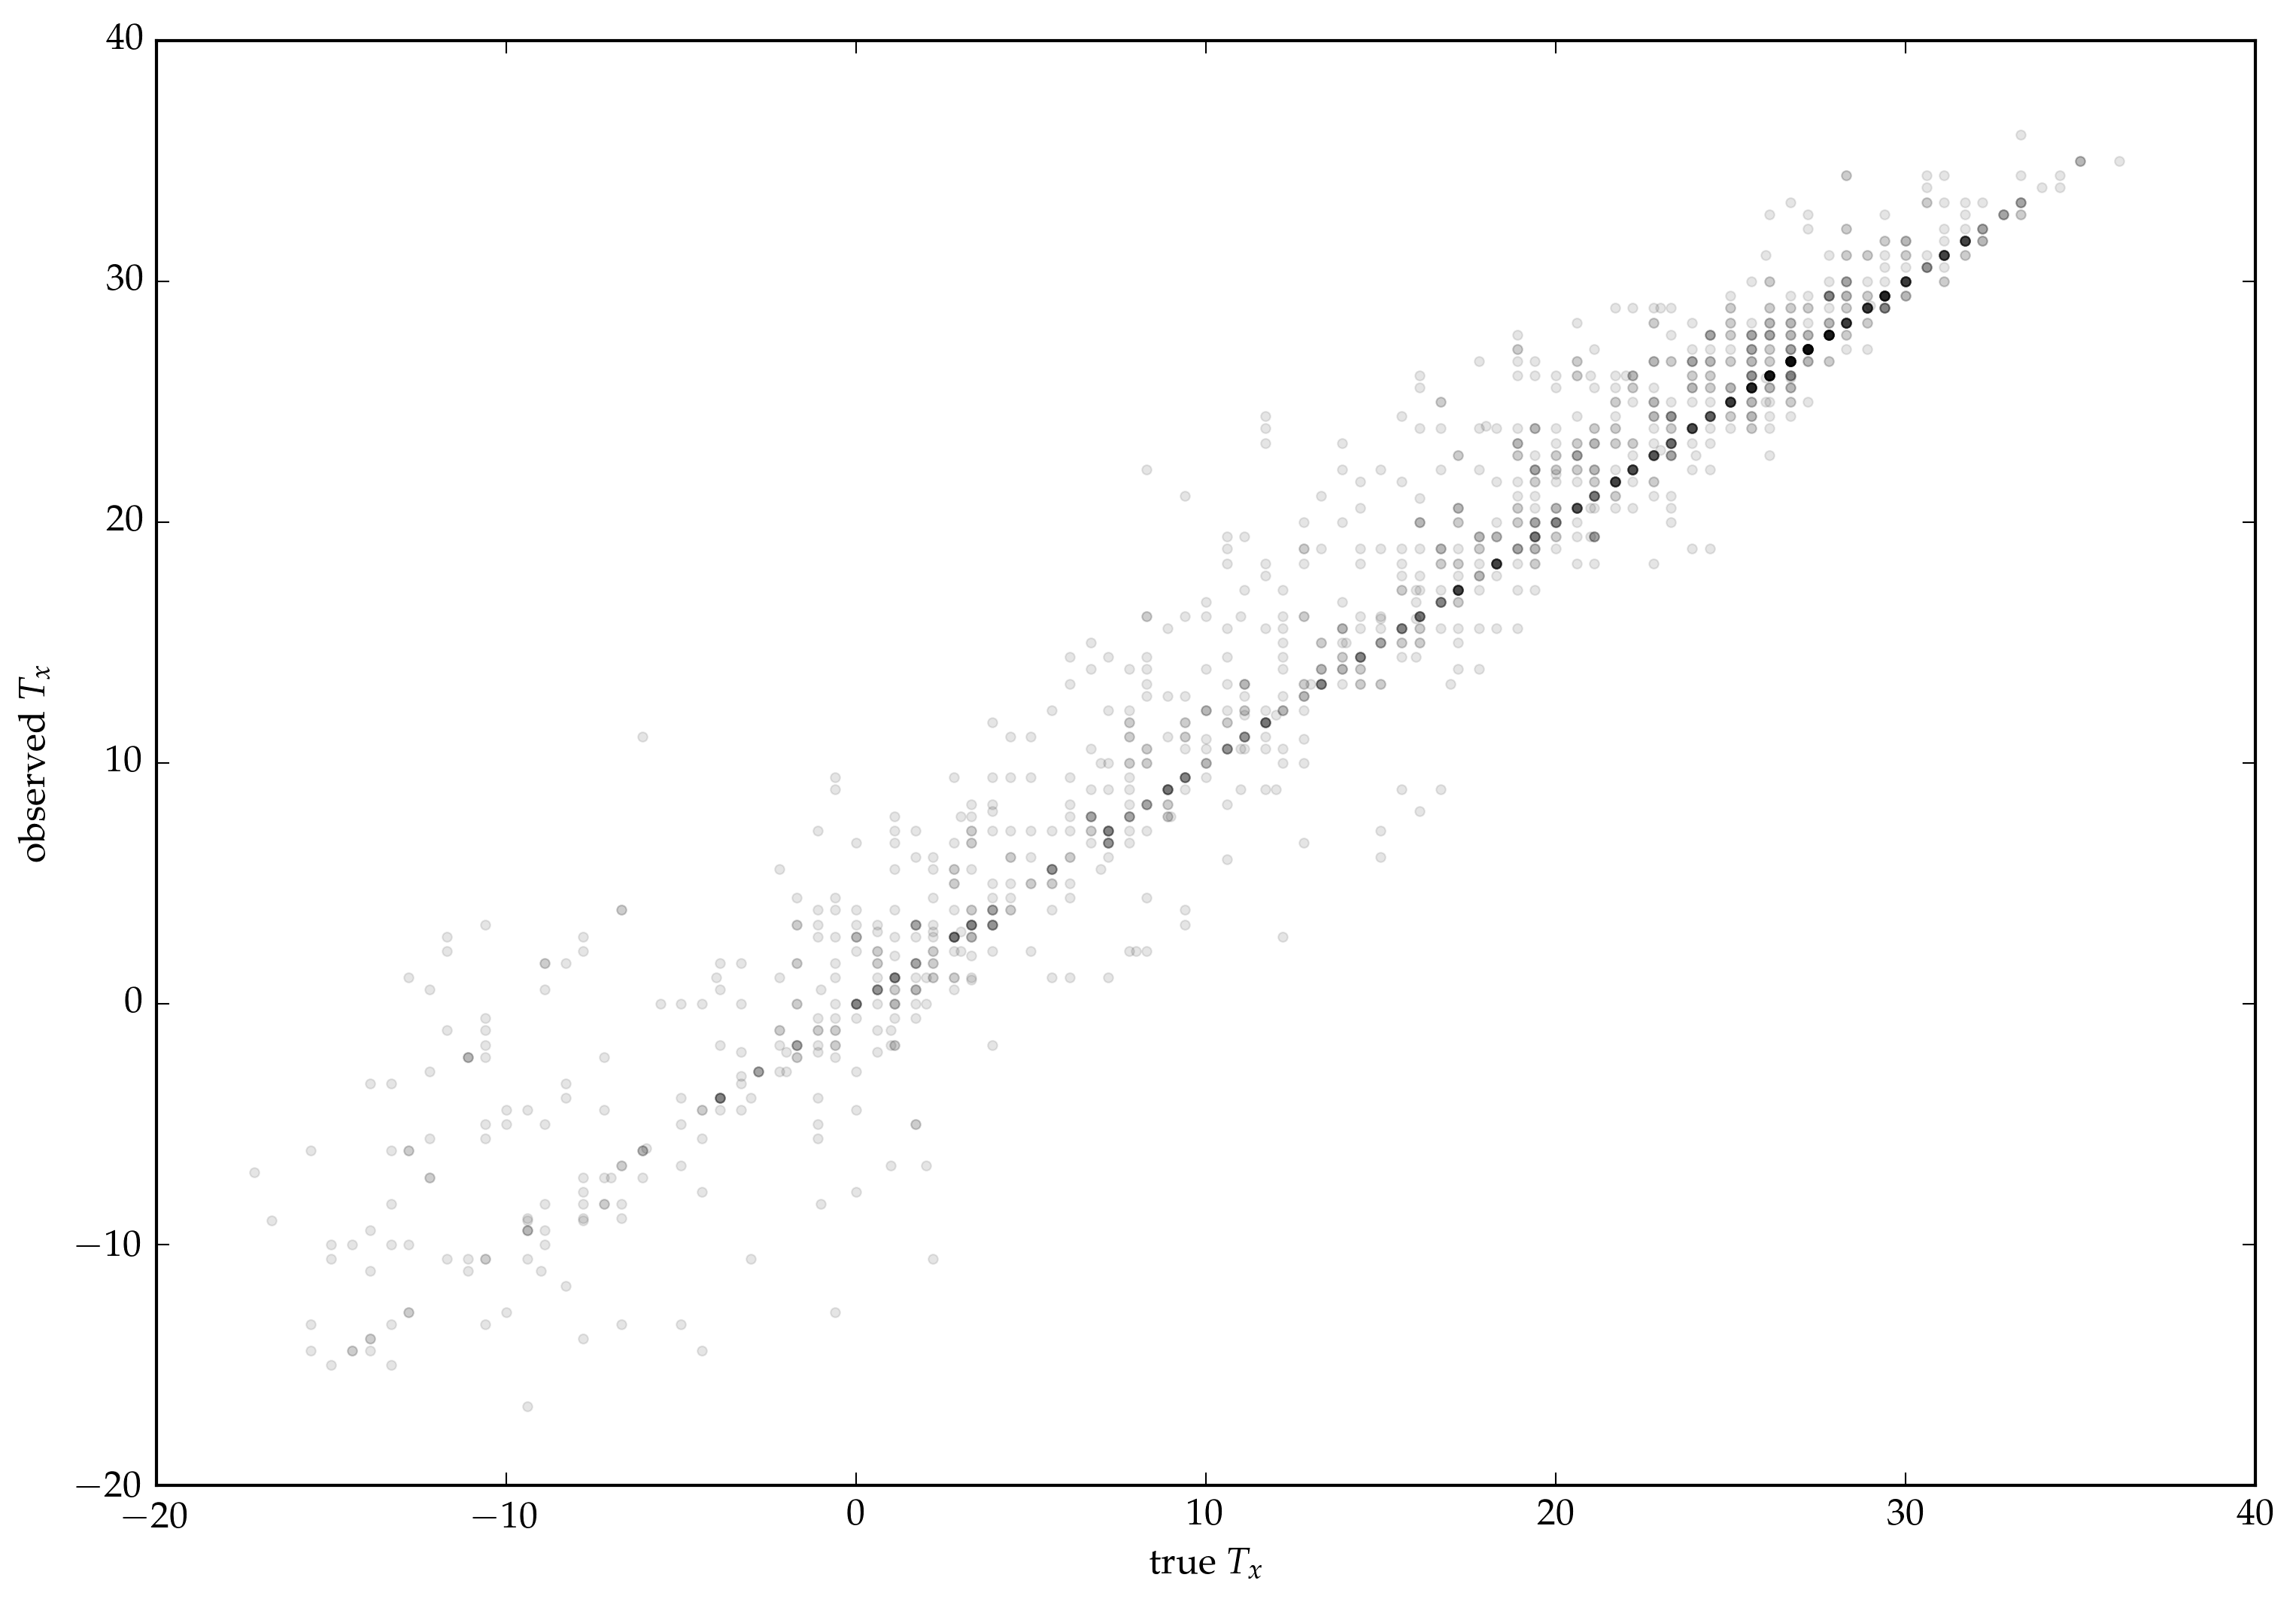

In [15]:
cm=plt.ColorMap("spectral")
Tx0 = TnTx_dict[Hour(5)][:Tx].values
hr = Hour(20)
Tx = TnTx_dict[hr][:Tx].values
col=cm(float(hr)/24.0)
plt.plot(Tx0, Tx, ".", color="black", alpha=0.1)
plt.xlabel(L"true $T_x$")
plt.ylabel(L"observed $T_x$")
;

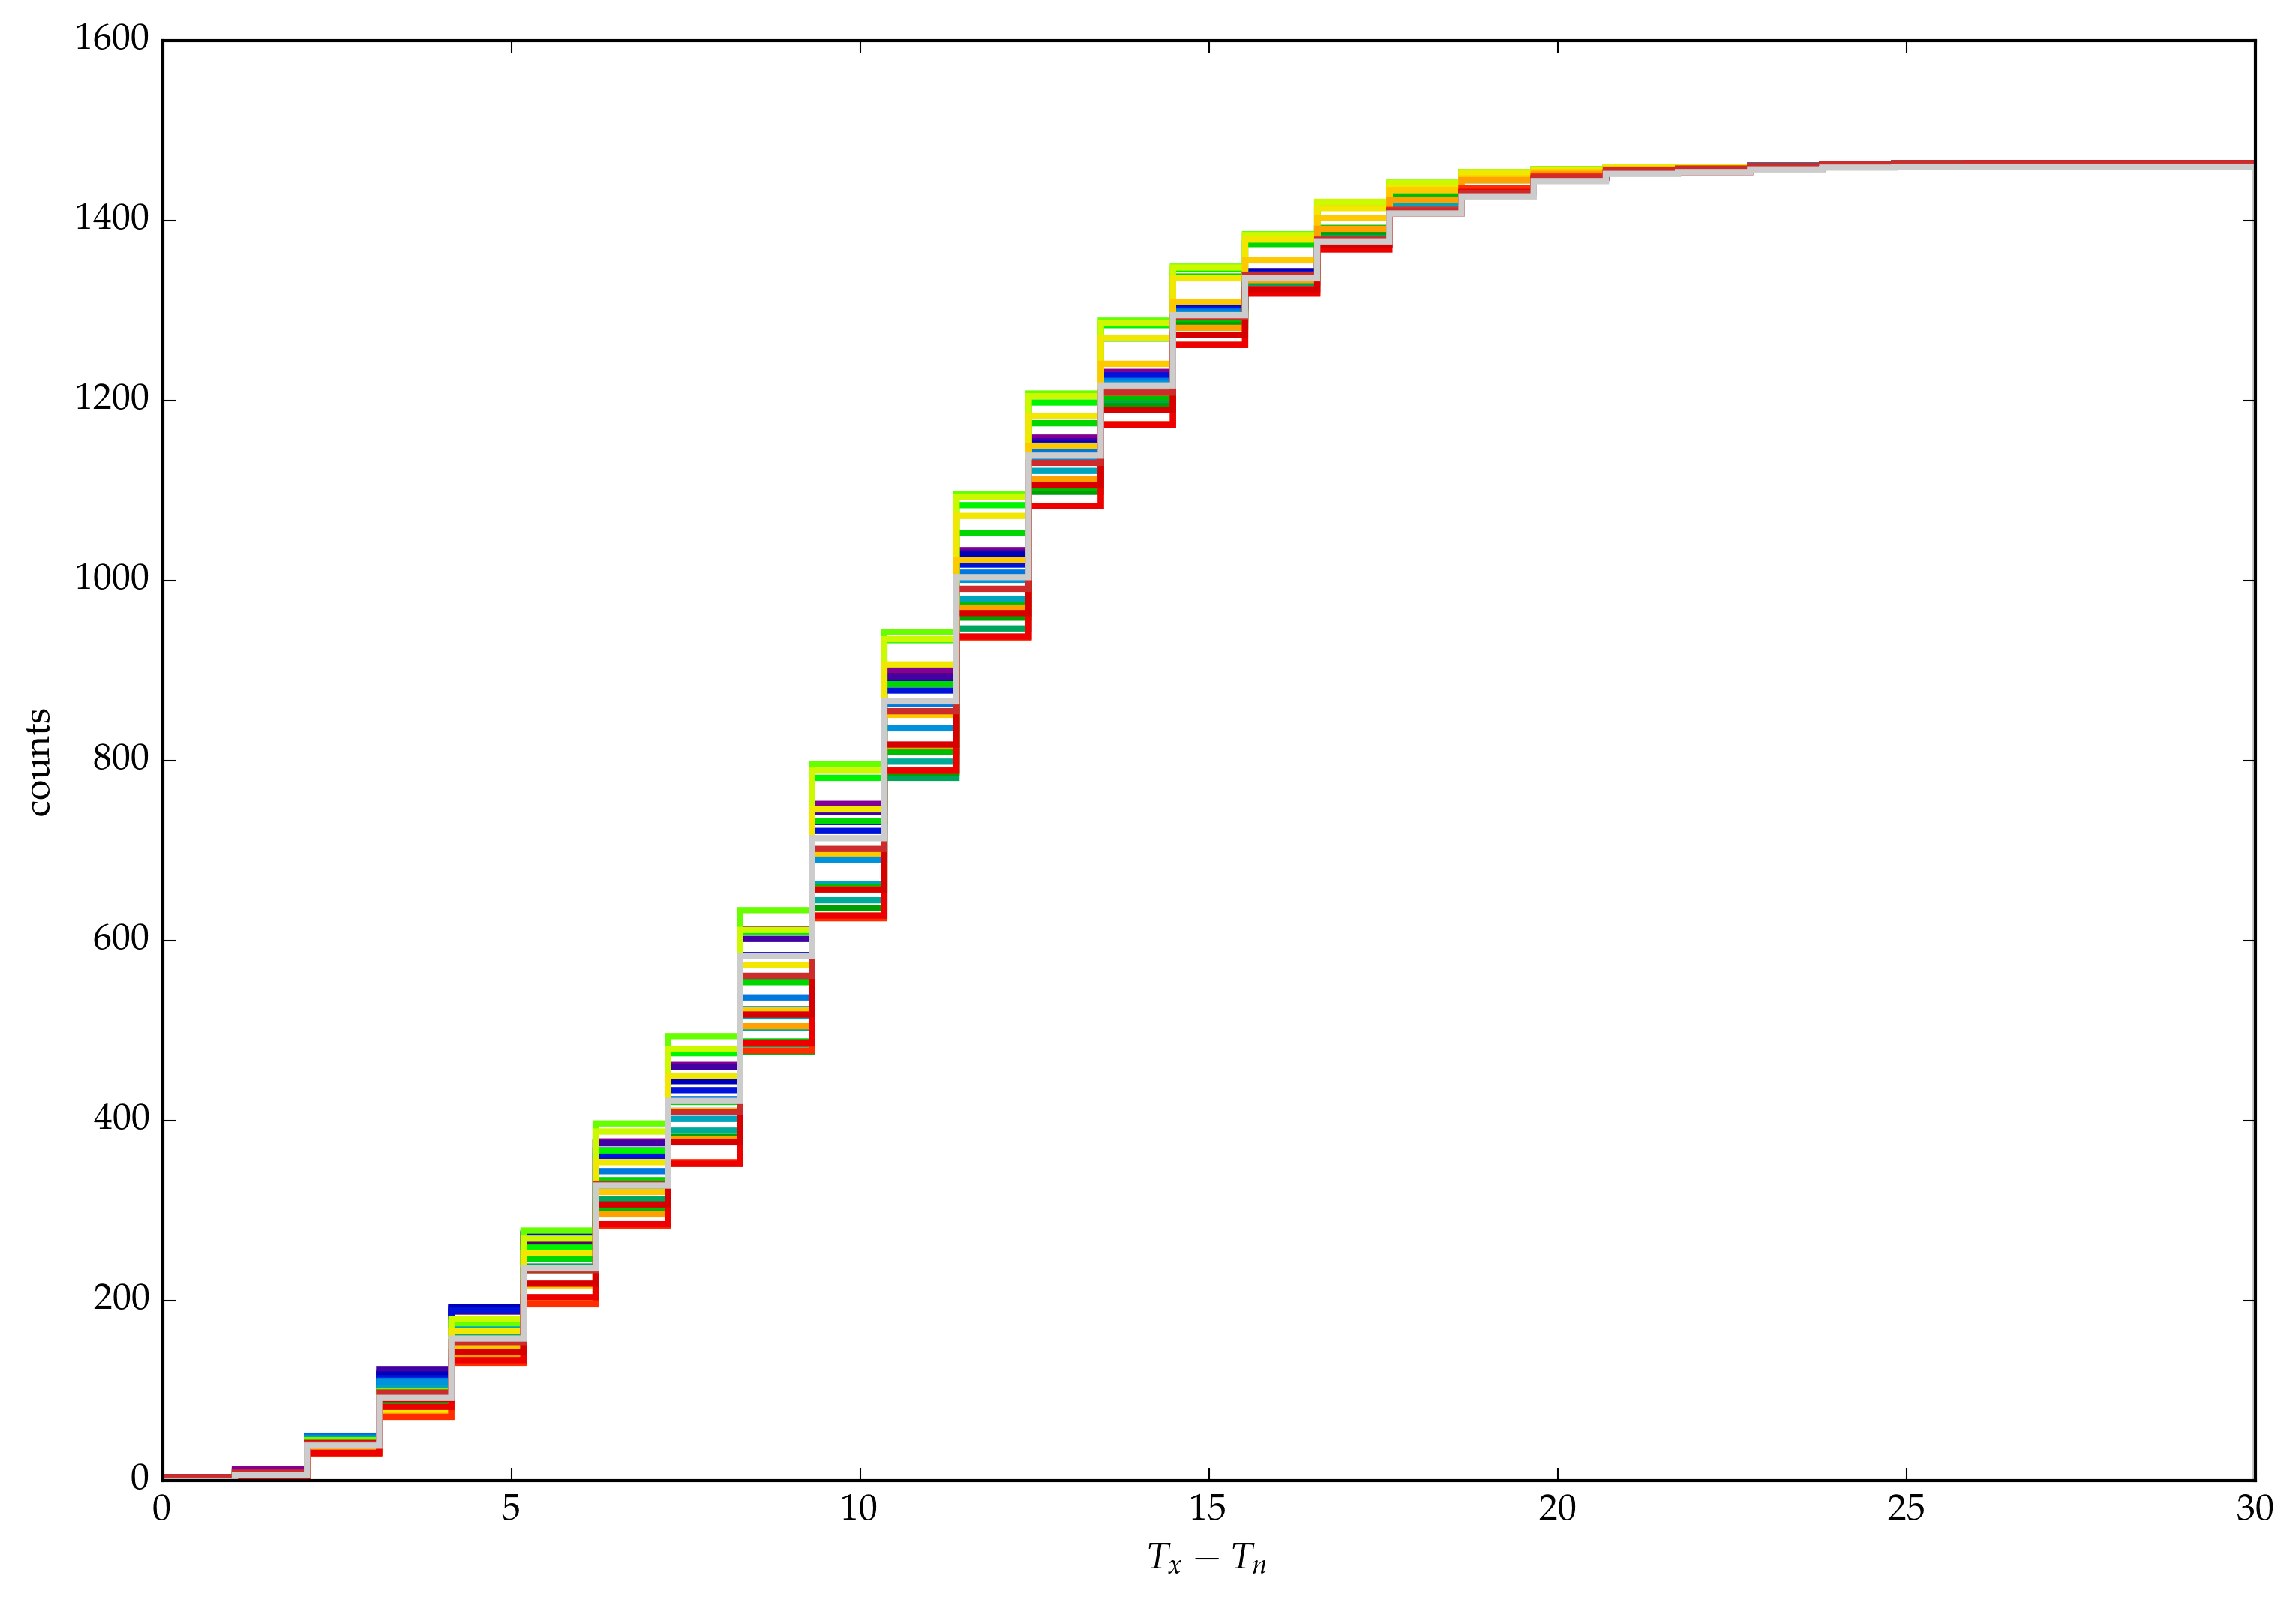

PyObject <matplotlib.text.Text object at 0x3275ce590>

In [16]:
cm=plt.ColorMap("spectral")
for hr in Hour(1):Hour(24)
    diffs = TnTx_dict[hr][:Tx].-TnTx_dict[hr][:Tn]
    plt.plt[:hist](diffs.values, 
        bins=linspace(0,30,30), 
        color=cm(float(hr)/24.0), 
        linewidth=2, 
        histtype="step",
        cumulative=true,
        )
end
plt.xlabel(L"$T_x-T_n$")
plt.ylabel("counts")

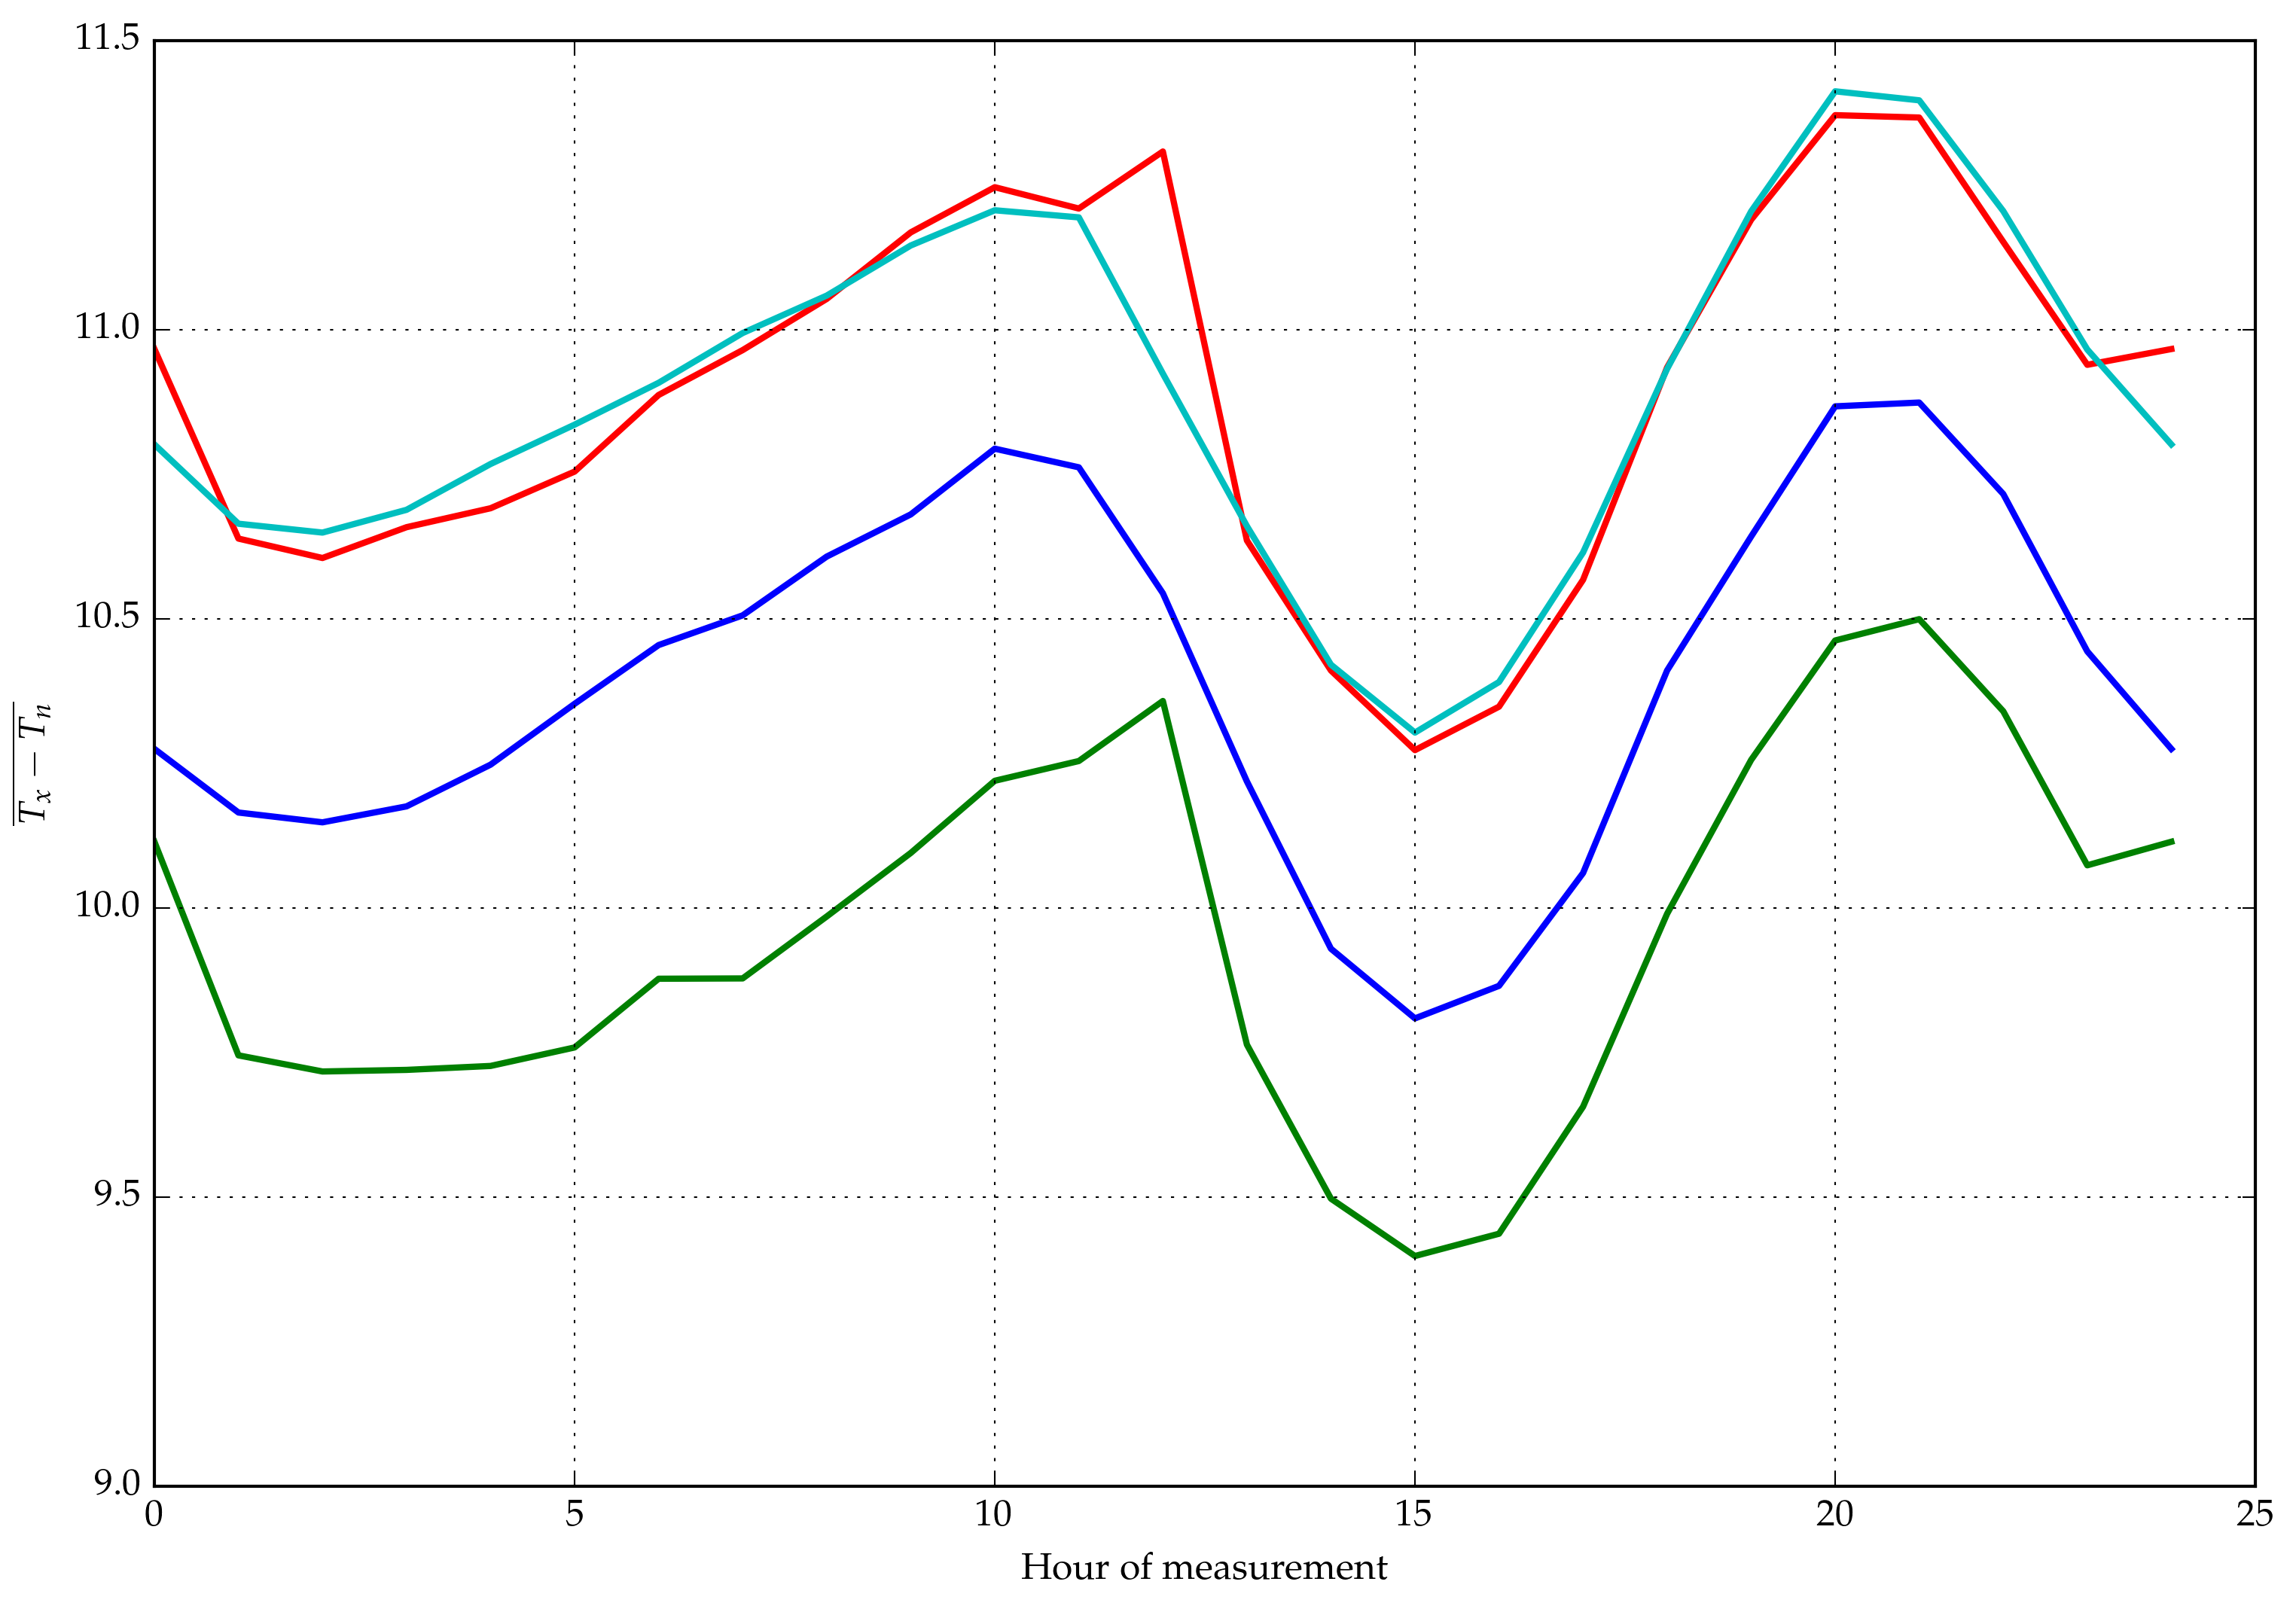

  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/imolk/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/imolk/.julia/v0.5/PyCall/src/PyCall.jl
  li

In [17]:
begin
    meandiff = Dict{Int64, Vector{Float64}}(
        1=>Float64[],
        2=>Float64[],
        3=>Float64[],
        4=>Float64[]
        )
    for hr in Hour(0):Hour(24)
        hr_mdiff = DataFrames.by(TnTx_dict[hr], :station, 
            df -> mean(df[:Tx].values.-df[:Tn].values))
        for station in 1:4
            push!(meandiff[station], get(hr_mdiff[station,:x1]))
        end
    end

    for station in 1:4
        plt.plot(0:24, meandiff[station], linewidth=2)
#         plt.axhline(meandiff[station][4], color="black")
    end
    plt.ylabel(L"$\overline{T_x-T_n}$")
    plt.xlabel("Hour of measurement")
    plt.grid(true)
end

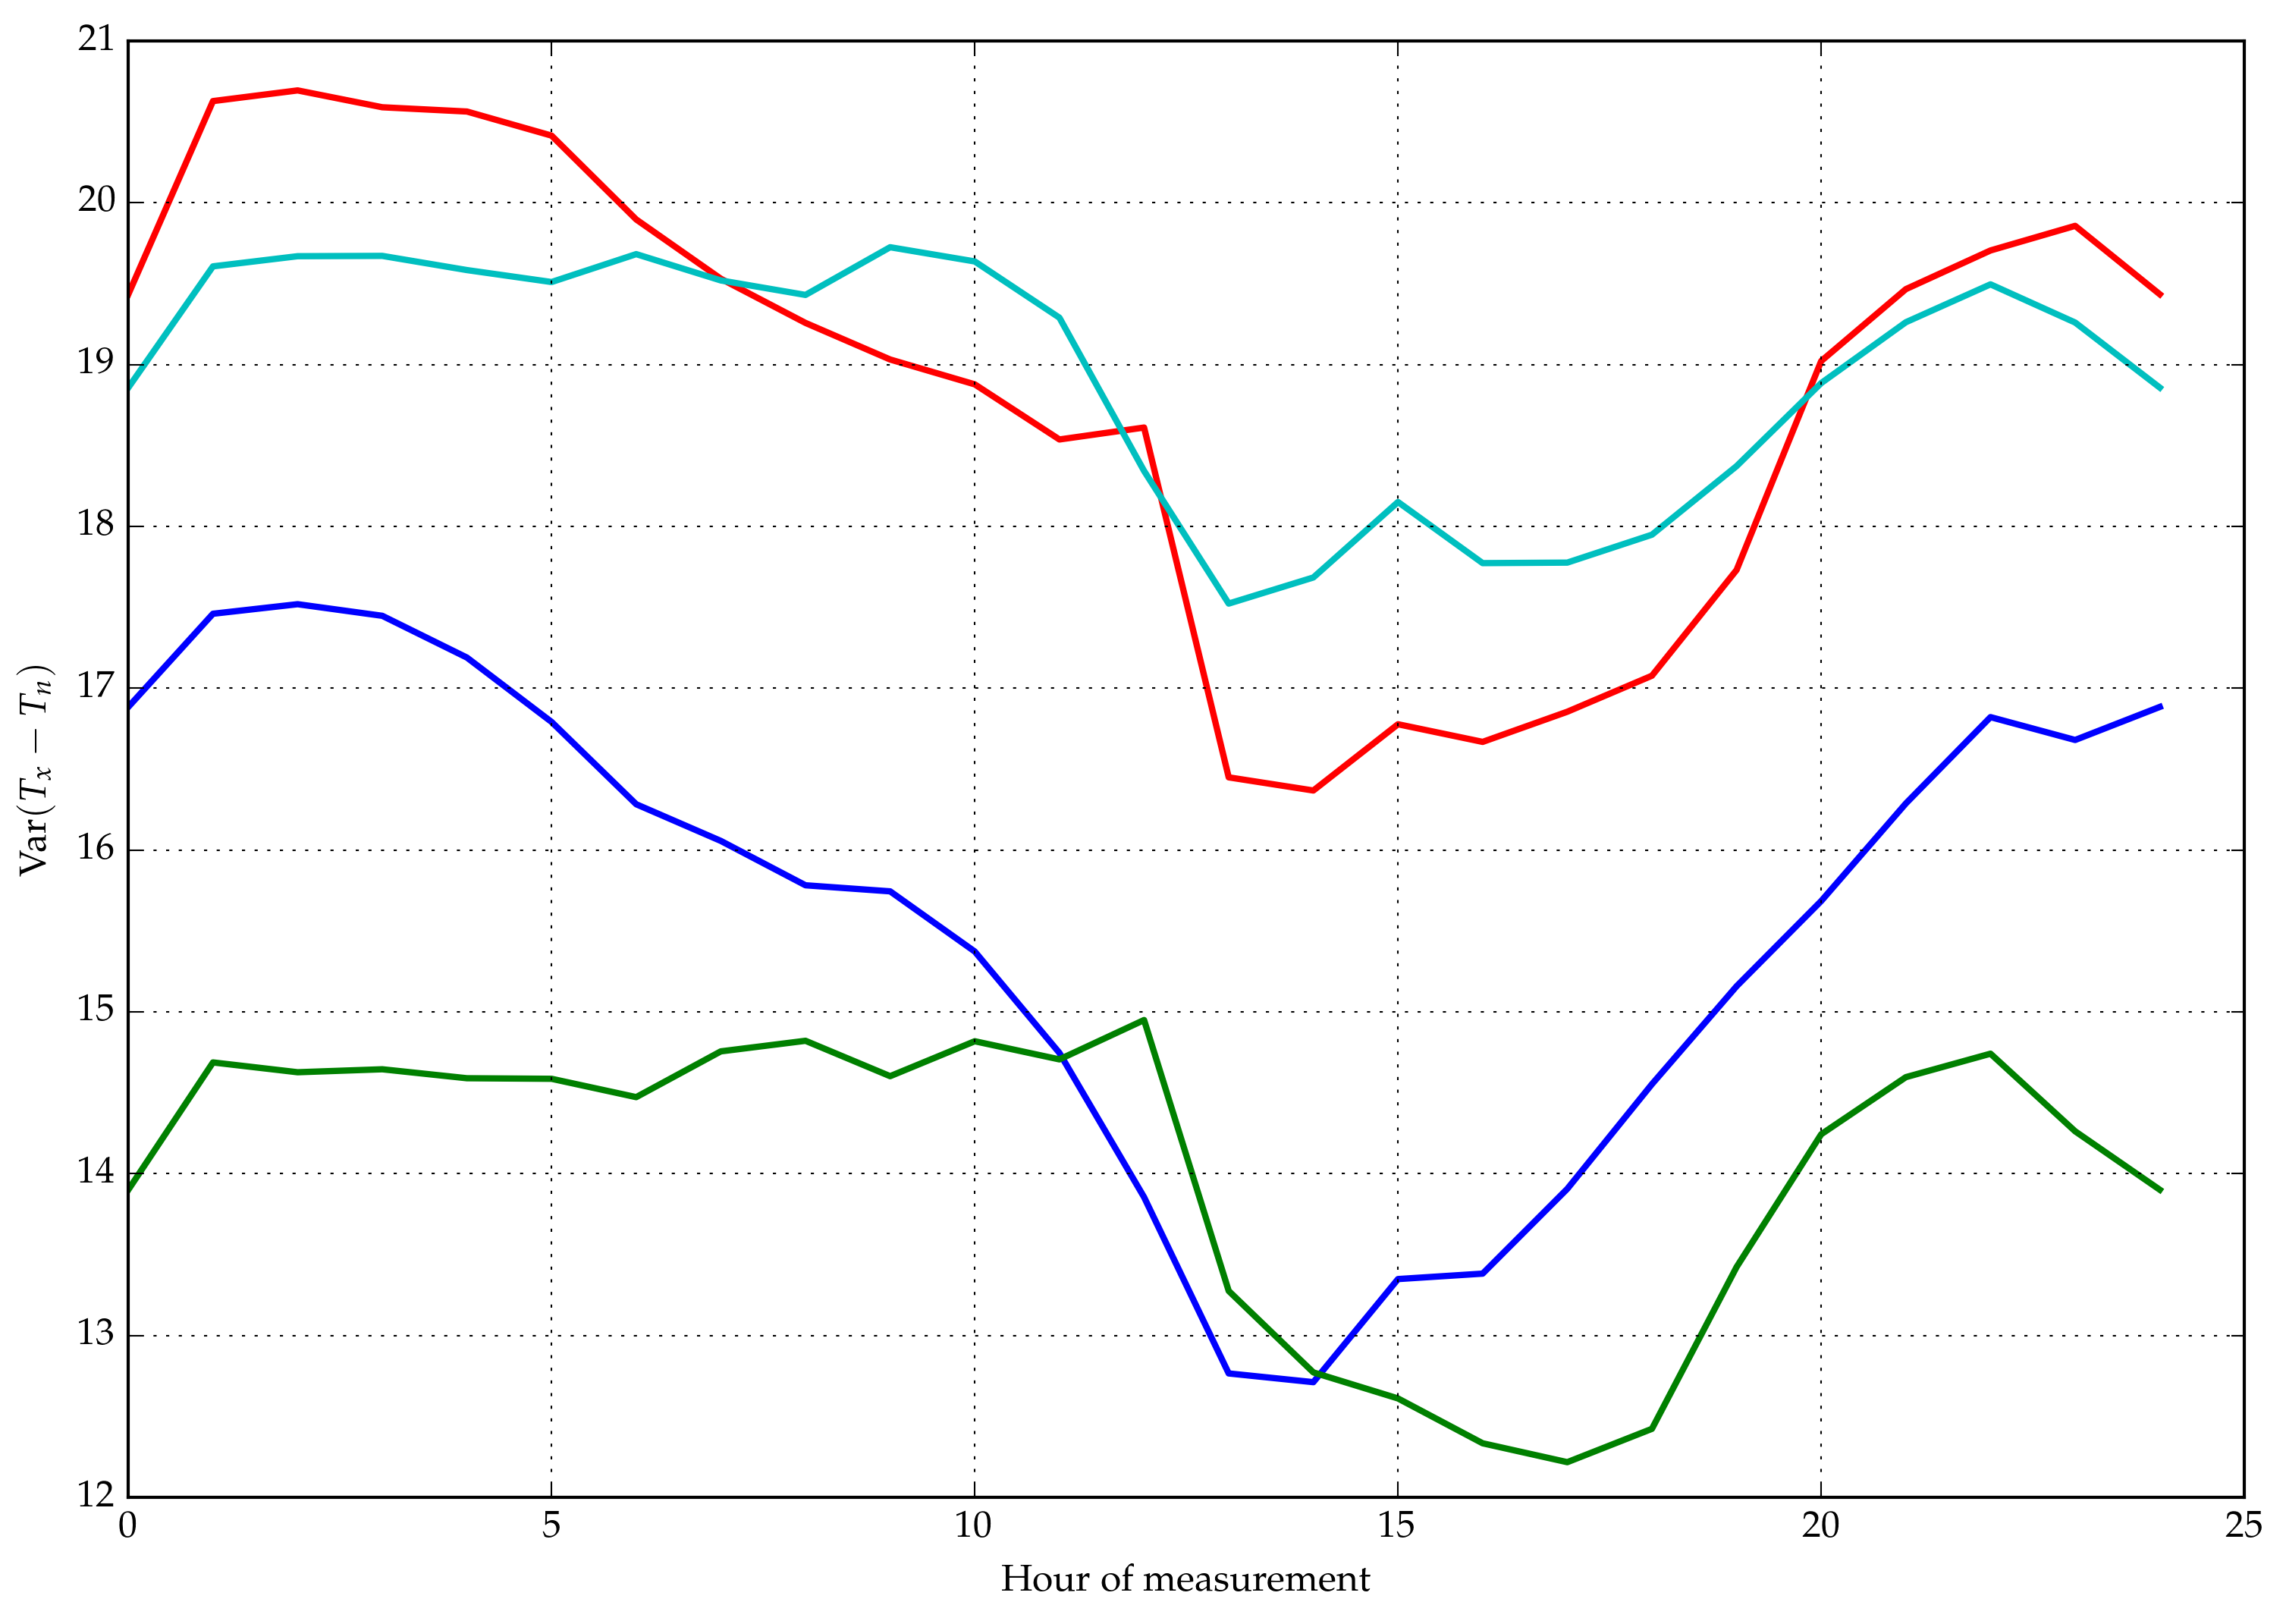

In [18]:
begin
    vardiff = Dict{Int64, Vector{Float64}}(
        1=>Float64[],
        2=>Float64[],
        3=>Float64[],
        4=>Float64[]
        )
    for hr in Hour(0):Hour(24)
        hr_diff = DataFrames.by(TnTx_dict[hr], :station, 
            df -> var(df[:Tx].values.-df[:Tn].values))
        for station in 1:4
            push!(vardiff[station], get(hr_diff[station,:x1]))
        end
    end

    for station in 1:4
        plt.plot(0:24, vardiff[station], linewidth=2)
#         plt.axhline(vardiff[station][4], color="black")
    end
    plt.ylabel(L"$\mathrm{Var}(T_x-T_n)$")
    plt.xlabel("Hour of measurement")
    plt.grid()
end